In [117]:
# Import necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Performn EDA on Dataset with Worldwide Conflicts

In [118]:
conflicts_data = pd.read_excel("conflicts.xls")

In [119]:
conflicts_data

gwno                   country  year  ongoing   gwarea_tot  \
0        2  United States of America  1989      NaN          NaN   
1        2  United States of America  1990      NaN          NaN   
2        2  United States of America  1991      NaN          NaN   
3        2  United States of America  1992      NaN          NaN   
4        2  United States of America  1993      NaN          NaN   
...    ...                       ...   ...      ...          ...   
5011   990            American Samoa  2012      0.0  2948.588623   
5012   990            American Samoa  2013      0.0  2948.588623   
5013   990            American Samoa  2014      0.0  2948.588623   
5014   990            American Samoa  2015      0.0  2948.588623   
5015   990            American Samoa  2016      0.0  2948.588623   

      gwsum_bestdeaths  gwsum_best_sb  gwshare_confl          gwpop  \
0                  NaN            NaN            NaN            NaN   
1                  NaN            NaN            NaN            NaN   
2                  NaN            NaN            NaN            NaN   
3                  NaN            NaN            NaN            NaN   
4                  NaN            NaN            NaN            NaN   
...                ...            ...            ...            ...   
5011               0.0            0.0            NaN  170679.406250   
5012               0.0            0.0            NaN  172006.593750   
5013               0.0            0.0            NaN  173333.796875   
5014               0.0            0.0            NaN  174660.984375   
5015               0.0            0.0            NaN  175988.187500   

      gwpop_confl  gwpopshare_confl  maxintensity  maxcumulativeintensity  \
0             NaN               NaN           NaN                     NaN   
1             NaN               NaN           NaN                     NaN   
2             NaN               NaN           NaN                     NaN   
3             NaN               NaN           NaN                     NaN   
4             NaN               NaN           NaN                     NaN   
...           ...               ...           ...                     ...   
5011          0.0               NaN           NaN                     NaN   
5012          0.0               NaN           NaN                     NaN   
5013          0.0               NaN           NaN                     NaN   
5014          0.0               NaN           NaN                     NaN   
5015          0.0               NaN           NaN                     NaN   

      peaceyears  peaceyearshigh  postconflict  pop_affected  area_affected  
0           19.0            19.0           NaN           NaN            NaN  
1           20.0            20.0           NaN           NaN            NaN  
2           21.0            21.0           NaN           NaN            NaN  
3           22.0            22.0           NaN           NaN            NaN  
4           23.0            23.0           NaN           NaN            NaN  
...          ...             ...           ...           ...            ...  
5011        12.0            12.0           0.0           NaN            NaN  
5012        13.0            13.0           0.0           NaN            NaN  
5013        14.0            14.0           0.0           NaN            NaN  
5014        15.0            15.0           0.0           NaN            NaN  
5015        16.0            16.0           0.0           NaN            NaN  

[5016 rows x 18 columns]

In [120]:
#Delete rows with all NaN values

conflicts_data.dropna(how='all')
conflicts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gwno                    5016 non-null   int64  
 1   country                 5016 non-null   object 
 2   year                    5016 non-null   int64  
 3   ongoing                 4988 non-null   float64
 4   gwarea_tot              3203 non-null   float64
 5   gwsum_bestdeaths        3203 non-null   float64
 6   gwsum_best_sb           3203 non-null   float64
 7   gwshare_confl           449 non-null    float64
 8   gwpop                   3203 non-null   float64
 9   gwpop_confl             3203 non-null   float64
 10  gwpopshare_confl        449 non-null    float64
 11  maxintensity            807 non-null    float64
 12  maxcumulativeintensity  659 non-null    float64
 13  peaceyears              4225 non-null   float64
 14  peaceyearshigh          4225 non-null   

In [121]:
# Replace NaN values in numeric columns with the mean except the "Ongoing" column

for col in conflicts_data.columns:
    exclude_columns = ['ongoing', 'maxintensity', 'maxcumulativeintensity']

for col in conflicts_data.columns:
    if col not in exclude_columns:
        # Calculate the mean of the column, ignoring NaNs
        mean_value = pd.to_numeric(conflicts_data[col], errors='coerce').mean()
        # Replace NaN values with the mean value
        conflicts_data[col] = conflicts_data[col].fillna(mean_value)

conflicts_data.head()

gwno                   country  year  ongoing     gwarea_tot  \
0     2  United States of America  1989      NaN  688213.070225   
1     2  United States of America  1990      NaN  688213.070225   
2     2  United States of America  1991      NaN  688213.070225   
3     2  United States of America  1992      NaN  688213.070225   
4     2  United States of America  1993      NaN  688213.070225   

   gwsum_bestdeaths  gwsum_best_sb  gwshare_confl         gwpop   gwpop_confl  \
0        234.581954     171.199188       0.163036  3.523417e+07  2.524399e+06   
1        234.581954     171.199188       0.163036  3.523417e+07  2.524399e+06   
2        234.581954     171.199188       0.163036  3.523417e+07  2.524399e+06   
3        234.581954     171.199188       0.163036  3.523417e+07  2.524399e+06   
4        234.581954     171.199188       0.163036  3.523417e+07  2.524399e+06   

   gwpopshare_confl  maxintensity  maxcumulativeintensity  peaceyears  \
0          0.241485           NaN                     NaN        19.0   
1          0.241485           NaN                     NaN        20.0   
2          0.241485           NaN                     NaN        21.0   
3          0.241485           NaN                     NaN        22.0   
4          0.241485           NaN                     NaN        23.0   

   peaceyearshigh  postconflict  pop_affected  area_affected  
0            19.0      0.286296     24.148451      16.303622  
1            20.0      0.286296     24.148451      16.303622  
2            21.0      0.286296     24.148451      16.303622  
3            22.0      0.286296     24.148451      16.303622  
4            23.0      0.286296     24.148451      16.303622

In [122]:
# Determine how many conflicts are ongoing

conflicts_data.value_counts('ongoing')

ongoing
0.0    4197
1.0     791
Name: count, dtype: int64

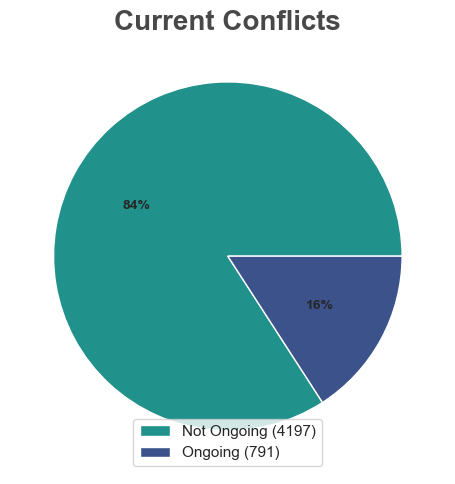

In [123]:
plt.figure(figsize=(10, 5))

# Get the counts of each type of owner
current_conflicts=conflicts_data.value_counts('ongoing',dropna=True)

# Create labels for the legend
labels = ['Not Ongoing (4197)','Ongoing (791)']
colors = ['#21918c', '#3b528b', '#fde725']

# Plot the pie chart
patches, texts, autotexts = plt.pie(
    current_conflicts, colors=colors, autopct='%.0f%%', textprops={'fontsize': 10, 'fontweight': 'bold'})

# Add a legend
plt.legend(patches, labels, loc="lower center")

# Set title
plt.title('Current Conflicts', loc='center',
          fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': '#484848'}) 

# Export figure
plt.savefig("Conflicts.png", dpi=300)

# Show the plot
#plt.axis('equal')
plt.tight_layout()
plt.show()

In [124]:
#Determine the level of intensity of conflicts
conflicts_data.value_counts('maxintensity')

maxintensity
1.0    586
2.0    221
Name: count, dtype: int64

In [125]:
conflicts_data.columns

Index(['gwno', 'country', 'year', 'ongoing', 'gwarea_tot', 'gwsum_bestdeaths',
       'gwsum_best_sb', 'gwshare_confl', 'gwpop', 'gwpop_confl',
       'gwpopshare_confl', 'maxintensity', 'maxcumulativeintensity',
       'peaceyears', 'peaceyearshigh', 'postconflict', 'pop_affected',
       'area_affected'],
      dtype='object')

In [126]:
# Determine how many different countries there are
unique_countries = conflicts_data["country"].unique()
unique_countries

array(['United States of America', 'Canada', 'Bahamas', 'Cuba', 'Haiti',
       'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Barbados',
       'Dominica', 'Grenada', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'Antigua & Barbuda',
       'Saint Kitts and Nevis', 'Mexico', 'Belize', 'Guatemala',
       'Honduras', 'El Salvador', 'Nicaragua', 'Costa Rica', 'Panama',
       'Colombia', 'Venezuela', 'Guyana', 'Surinam', 'Ecuador', 'Peru',
       'Brazil', 'Bolivia', 'Paraguay', 'Chile', 'Argentina', 'Uruguay',
       'United Kingdom', 'Ireland', 'Netherlands', 'Belgium',
       'Luxembourg', 'France', 'Switzerland', 'Spain', 'Portugal',
       'German Federal Republic', 'Poland', 'Austria', 'Hungary',
       'Czechoslovakia', 'Czech Republic', 'Slovakia', 'Italy', 'Malta',
       'Albania', 'Serbia', 'Montenegro',
       'Macedonia (Former Yugoslav Republic of)', 'Croatia', 'Yugoslavia',
       'Bosnia-Herzegovina', 'Kosovo', 'Slovenia', 'Greece', 'Cyprus',
      

In [127]:
# Add the latitude and longitude of these countries to the data set to create maps in the future
countries_coordinates = {
    'United States of America': (37.0902, -95.7129),
    'Canada': (56.1304, -106.3468),
    'Bahamas': (25.0343, -77.3963),
    'Cuba': (21.5218, -77.7812),
    'Haiti': (18.9712, -72.2852),
    'Dominican Republic': (18.7357, -70.1627),
    'Jamaica': (18.1096, -77.2975),
    'Trinidad and Tobago': (10.6918, -61.2225),
    'Barbados': (13.1939, -59.5432),
    'Dominica': (15.4150, -61.3710),
    'Grenada': (12.1165, -61.6790),
    'Saint Lucia': (13.9094, -60.9789),
    'Saint Vincent and the Grenadines': (12.9843, -61.2872),
    'Antigua & Barbuda': (17.0608, -61.7964),
    'Saint Kitts and Nevis': (17.3578, -62.7830),
    'Mexico': (23.6345, -102.5528),
    'Belize': (17.1899, -88.4976),
    'Guatemala': (15.7835, -90.2308),
    'Honduras': (15.2000, -86.2419),
    'El Salvador': (13.7942, -88.8965),
    'Nicaragua': (12.8654, -85.2072),
    'Costa Rica': (9.7489, -83.7534),
    'Panama': (8.5379, -80.7821),
    'Colombia': (4.5709, -74.2973),
    'Venezuela': (6.4238, -66.5897),
    'Guyana': (4.8604, -58.9302),
    'Surinam': (3.9193, -56.0278),
    'Ecuador': (-1.8312, -78.1834),
    'Peru': (-9.1900, -75.0152),
    'Brazil': (-14.2350, -51.9253),
    'Bolivia': (-16.2902, -63.5887),
    'Paraguay': (-23.4425, -58.4438),
    'Chile': (-35.6751, -71.5430),
    'Argentina': (-38.4161, -63.6167),
    'Uruguay': (-32.5228, -55.7658),
    'United Kingdom': (55.3781, -3.4360),
    'Ireland': (53.1424, -7.6921),
    'Netherlands': (52.1326, 5.2913),
    'Belgium': (50.5039, 4.4699),
    'Luxembourg': (49.8153, 6.1296),
    'France': (46.6034, 1.8883),
    'Switzerland': (46.8182, 8.2275),
    'Spain': (40.4637, -3.7492),
    'Portugal': (39.3999, -8.2245),
    'German Federal Republic': (51.1657, 10.4515),
    'Poland': (51.9194, 19.1451),
    'Austria': (47.5162, 14.5501),
    'Hungary': (47.1625, 19.5033),
    'Czechoslovakia': (49.8175, 15.4730),
    'Czech Republic': (49.8175, 15.4730),
    'Slovakia': (48.6690, 19.6990),
    'Italy': (41.8719, 12.5674),
    'Malta': (35.9375, 14.3754),
    'Albania': (41.1533, 20.1683),
    'Serbia': (44.0165, 21.0059),
    'Montenegro': (42.7087, 19.3744),
    'Macedonia (Former Yugoslav Republic of)': (41.6086, 21.7453),
    'Croatia': (45.1000, 15.2000),
    'Yugoslavia': (44.7872, 20.4573),
    'Bosnia-Herzegovina': (43.9159, 17.6791),
    'Kosovo': (42.6026, 20.9020),
    'Slovenia': (46.1512, 14.9955),
    'Greece': (39.0742, 21.8243),
    'Cyprus': (35.1264, 33.4299),
    'Bulgaria': (42.7339, 25.4858),
    'Moldova': (47.4116, 28.3699),
    'Rumania': (45.9432, 24.9668),
    'Russia': (61.5240, 105.3188),
    'Estonia': (58.5953, 25.0136),
    'Latvia': (56.8796, 24.6032),
    'Lithuania': (55.1694, 23.8813),
    'Ukraine': (48.3794, 31.1656),
    'Belarus': (53.7098, 27.9534),
    'Armenia': (40.0691, 45.0382),
    'Georgia': (42.3154, 43.3569),
    'Azerbaijan': (40.1431, 47.5769),
    'Finland': (61.9241, 25.7482),
    'Sweden': (60.1282, 18.6435),
    'Norway': (60.4720, 8.4689),
    'Denmark': (56.2639, 9.5018),
    'Iceland': (64.9631, -19.0208),
    'Cape Verde': (16.5388, -23.0418),
    'São Tomé and Principe': (0.1864, 6.6131),
    'Guinea-Bissau': (11.8037, -15.1804),
    'Equatorial Guinea': (1.6508, 10.2679),
    'Gambia': (13.4432, -15.3101),
    'Mali': (17.5707, -3.9962),
    'Senegal': (14.4974, -14.4524),
    'Benin': (9.3077, 2.3158),
    'Mauritania': (21.0079, -10.9408),
    'Niger': (17.6078, 8.0817),
    'Cote D’Ivoire': (7.5399, -5.5471),
    'Guinea': (9.9456, -9.6966),
    'Burkina Faso': (12.2383, -1.5616),
    'Liberia': (6.4281, -9.4295),
    'Sierra Leone': (8.4606, -11.7799),
    'Ghana': (7.9465, -1.0232),
    'Togo': (8.6195, 0.8248),
    'Cameroon': (7.3697, 12.3547),
    'Nigeria': (9.0820, 8.6753),
    'Gabon': (-0.8037, 11.6094),
    'Central African Republic': (6.6111, 20.9394),
    'Chad': (15.4542, 18.7322),
    'Congo': (-0.2280, 15.8277),
    'DRC': (-4.0383, 21.7587),
    'Uganda': (1.3733, 32.2903),
    'Kenya': (-1.2921, 36.8219),
    'Tanzania': (-6.3690, 34.8888),
    'Burundi': (-3.3731, 29.9189),
    'Rwanda': (-1.9403, 29.8739),
    'Somalia': (5.1521, 46.1996),
    'Djibouti': (11.8251, 42.5903),
    'Ethiopia': (9.1450, 40.4897),
    'Eritrea': (15.1794, 39.7823),
    'Angola': (-11.2027, 17.8739),
    'Mozambique': (-18.6657, 35.5296),
    'Zambia': (-13.1339, 27.8493),
    'Zimbabwe': (-19.0154, 29.1549),
    'Malawi': (-13.2543, 34.3015),
    'South Africa': (-30.5595, 22.9375),
    'Namibia': (-22.9576, 18.4904),
    'Lesotho': (-29.6099, 28.2336),
    'Botswana': (-22.3285, 24.6849),
    'Swaziland': (-26.5225, 31.4659),
    'Madagascar': (-18.7669, 46.8691),
    'Comoros': (-11.6455, 43.3333),
    'Mauritius': (-20.3484, 57.5522),
    'Seychelles': (-4.6796, 55.4920),
    'Morocco': (31.7917, -7.0926),
    'Algeria': (28.0339, 1.6596),
    'Tunisia': (33.8869, 9.5375),
    'Libya': (26.3351, 17.2283),
    'Sudan': (12.8628, 30.2176),
    'South Sudan': (6.8770, 31.3070),
    'Iran': (32.4279, 53.6880),
    'Turkey': (38.9637, 35.2433),
    'Iraq': (33.2232, 43.6793),
    'Egypt': (26.8206, 30.8025),
    'Syria': (34.8021, 38.9968),
    'Lebanon': (33.8547, 35.8623),
    'Jordan': (30.5852, 36.2384),
    'Israel': (31.0461, 34.8516),
    'Saudi Arabia': (23.8859, 45.0792),
    'Yemen': (15.5527, 48.5164),
    'Kuwait': (29.3759, 47.9774),
    'Bahrain': (26.0667, 50.5577),
    'Qatar': (25.3548, 51.1839),
    'United Arab Emirates': (23.4241, 53.8478),
    'Oman': (21.4735, 55.9754),
    'Afghanistan': (33.9391, 67.7100),
    'Turkmenistan': (38.9697, 59.5563),
    'Tajikistan': (38.8610, 71.2761),
    'Kyrgyz Republic': (41.2044, 74.7661),
    'Uzbekistan': (41.3775, 64.5853),
    'Kazakhstan': (48.0196, 66.9237),
    'China': (35.8617, 104.1954),
    'Mongolia': (46.8625, 103.8467),
    "Korea, People's Republic of": (40.3399, 127.5101),
    'Korea, Republic of': (35.9078, 127.7669),
    'Japan': (36.2048, 138.2529),
    'India': (20.5937, 78.9629),
    'Bhutan': (27.5142, 90.4336),
    'Pakistan': (30.3753, 69.3451),
    'Bangladesh': (23.6850, 90.3563),
    'Myanmar': (21.9162, 95.9560),
    'Sri Lanka': (7.8731, 80.7718),
    'Maldives': (3.2028, 73.2207),
    'Nepal': (28.3949, 84.1240),
    'Thailand': (15.8700, 100.9925),
    'Cambodia (Kampuchea)': (12.5657, 104.9910),
    'Laos': (19.8563, 102.4955),
    'Vietnam, Democratic Republic of': (14.0583, 108.2772),
    'Malaysia': (4.2105, 101.9758),
    'Singapore': (1.3521, 103.8198),
    'Brunei': (4.5353, 114.7277),
    'Philippines': (12.8797, 121.7740),
    'Indonesia': (-0.7893, 113.9213),
    'East Timor': (-8.8742, 125.7275),
    'Australia': (-25.2744, 133.7751),
    'Papua New Guinea': (-6.314993, 143.95555),
    'New Zealand': (-40.9006, 174.8860),
    'Vanuatu': (-15.3767, 166.9592),
    'Solomon Islands': (-9.6457, 160.1562),
    'Fiji': (-17.7134, 178.0650),
    'Kiribati': (-3.3704, -168.7340),
    'Nauru': (-0.5228, 166.9315),
    'Tonga': (-21.178986, -175.198242),
    'Tuvalu': (-7.1095, 179.194),
    'Marshall Islands': (7.1315, 171.1845),
    'Palau': (7.51498, 134.58252),
    'Federated States of Micronesia': (7.425554, 150.550812),
    'American Samoa': (-14.270972, -170.132217)
}

# Add latitude and longitude columns to the DataFrame using the predefined coordinates
conflicts_data['coordinates'] = conflicts_data['country'].map(lambda x: countries_coordinates.get(x, (None, None)))

# Display the updated DataFrame
conflicts_data.head()

gwno                   country  year  ongoing     gwarea_tot  \
0     2  United States of America  1989      NaN  688213.070225   
1     2  United States of America  1990      NaN  688213.070225   
2     2  United States of America  1991      NaN  688213.070225   
3     2  United States of America  1992      NaN  688213.070225   
4     2  United States of America  1993      NaN  688213.070225   

   gwsum_bestdeaths  gwsum_best_sb  gwshare_confl         gwpop   gwpop_confl  \
0        234.581954     171.199188       0.163036  3.523417e+07  2.524399e+06   
1        234.581954     171.199188       0.163036  3.523417e+07  2.524399e+06   
2        234.581954     171.199188       0.163036  3.523417e+07  2.524399e+06   
3        234.581954     171.199188       0.163036  3.523417e+07  2.524399e+06   
4        234.581954     171.199188       0.163036  3.523417e+07  2.524399e+06   

   gwpopshare_confl  maxintensity  maxcumulativeintensity  peaceyears  \
0          0.241485           NaN                     NaN        19.0   
1          0.241485           NaN                     NaN        20.0   
2          0.241485           NaN                     NaN        21.0   
3          0.241485           NaN                     NaN        22.0   
4          0.241485           NaN                     NaN        23.0   

   peaceyearshigh  postconflict  pop_affected  area_affected  \
0            19.0      0.286296     24.148451      16.303622   
1            20.0      0.286296     24.148451      16.303622   
2            21.0      0.286296     24.148451      16.303622   
3            22.0      0.286296     24.148451      16.303622   
4            23.0      0.286296     24.148451      16.303622   

           coordinates  
0  (37.0902, -95.7129)  
1  (37.0902, -95.7129)  
2  (37.0902, -95.7129)  
3  (37.0902, -95.7129)  
4  (37.0902, -95.7129)

In [128]:
conflicts_data.columns

Index(['gwno', 'country', 'year', 'ongoing', 'gwarea_tot', 'gwsum_bestdeaths',
       'gwsum_best_sb', 'gwshare_confl', 'gwpop', 'gwpop_confl',
       'gwpopshare_confl', 'maxintensity', 'maxcumulativeintensity',
       'peaceyears', 'peaceyearshigh', 'postconflict', 'pop_affected',
       'area_affected', 'coordinates'],
      dtype='object')

In [129]:
import folium

# Filter the DataFrame to include only rows where 'ongoing' is 1
ongoing_conflicts = conflicts_data[conflicts_data['ongoing'] == 1]

# Calculate the total deaths per country for ongoing conflicts
deaths_per_country = ongoing_conflicts.groupby('country')['gwsum_bestdeaths'].sum().reset_index(name='total_deaths')

# Create a dictionary for quick lookup
deaths_per_country_dict = deaths_per_country.set_index('country')['total_deaths'].to_dict()

# Create a world map
map_conflicts = folium.Map(location=[0, 0], zoom_start=3, tiles="CartoDB dark_matter")

# Add points to the map with sizes based on the total deaths
for country, deaths in deaths_per_country_dict.items():
    if country in countries_coordinates:
        folium.CircleMarker(
            location=countries_coordinates[country],
            radius=(deaths ** 0.5) / 20,  # Use the square root to normalize the size, adjust divisor as needed for better visualization
            popup=f'{country}: {deaths} deaths',
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.7,
            weight=2
        ).add_to(map_conflicts)

# Display the map
map_conflicts

In [130]:
# Calculate how many conflicts per country

conflicts_per_country_year = conflicts_data.groupby(['country', 'year']).size().reset_index(name='conflict_count')

# Pivot the DataFrame to have years as columns
conflicts_pivot = conflicts_per_country_year.pivot(index='country', columns='year', values='conflict_count').fillna(0)

conflicts_pivot.head(25)

year                1989  1990  1991  1992  1993  1994  1995  1996  1997  \
country                                                                    
Afghanistan          1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Albania              1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Algeria              1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
American Samoa       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Angola               1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Antigua & Barbuda    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Argentina            1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Armenia              0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Australia            1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Austria              1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Azerbaijan           0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Bahamas              1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Bahrain              1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Bangladesh           1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Barbados             1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Belgium              1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Belize               1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Belraus              0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Benin                1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Bhutan               1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Bolivia              1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Bosnia-Herzegovina   0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   
Botswana             1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Brazil               1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Brunei               1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   

year                1998  ...  2007  2008  2009  2010  2011  2012  2013  2014  \
country                   ...                                                   
Afghanistan          1.0  ...   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Albania              1.0  ...   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Algeria              1.0  ...   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
American Samoa       0.0  ...   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Angola               1.0  ...   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Antigua & Barbuda    0.0  ...   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Argentina            1.0  ...   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Armenia              1.0  ...   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Australia            1.0  ...   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Austria              1.0  ...   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Azerbaijan           1.0  ...   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Bahamas              1.0  ...   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Bahrain              1.0  ...   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Bangladesh           1.0  ...   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Barbados             1.0  ...   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Belgium              1.0  ...   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Belize               1.0  ...   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Belraus              1.0  ...   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Benin                1.0  ...   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Bhutan               1.0  ...   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Bolivia              1.0  ...   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Bosnia-Herzegovina   1.0  ...   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Bot

In [131]:
# Calculate conflicts per year

conflicts_per_year_country = conflicts_data.groupby(['year', 'country']).size().reset_index(name='conflict_count')

# Pivot the DataFrame to have years as columns
conflicts_pivot1 = conflicts_per_year_country.pivot(index='year', columns='country', values='conflict_count').fillna(0)

conflicts_pivot1.head(25)

country  Afghanistan  Albania  Algeria  American Samoa  Angola  \
year                                                             
1989             1.0      1.0      1.0             0.0     1.0   
1990             1.0      1.0      1.0             0.0     1.0   
1991             1.0      1.0      1.0             0.0     1.0   
1992             1.0      1.0      1.0             0.0     1.0   
1993             1.0      1.0      1.0             0.0     1.0   
1994             1.0      1.0      1.0             0.0     1.0   
1995             1.0      1.0      1.0             0.0     1.0   
1996             1.0      1.0      1.0             0.0     1.0   
1997             1.0      1.0      1.0             0.0     1.0   
1998             1.0      1.0      1.0             0.0     1.0   
1999             1.0      1.0      1.0             0.0     1.0   
2000             1.0      1.0      1.0             1.0     1.0   
2001             1.0      1.0      1.0             1.0     1.0   
2002             1.0      1.0      1.0             1.0     1.0   
2003             1.0      1.0      1.0             1.0     1.0   
2004             1.0      1.0      1.0             1.0     1.0   
2005             1.0      1.0      1.0             1.0     1.0   
2006             1.0      1.0      1.0             1.0     1.0   
2007             1.0      1.0      1.0             1.0     1.0   
2008             1.0      1.0      1.0             1.0     1.0   
2009             1.0      1.0      1.0             1.0     1.0   
2010             1.0      1.0      1.0             1.0     1.0   
2011             1.0      1.0      1.0             1.0     1.0   
2012             1.0      1.0      1.0             1.0     1.0   
2013             1.0      1.0      1.0             1.0     1.0   

country  Antigua & Barbuda  Argentina  Armenia  Australia  Austria  ...  \
year                                                                ...   
1989                   0.0        1.0      0.0        1.0      1.0  ...   
1990                   0.0        1.0      0.0        1.0      1.0  ...   
1991                   0.0        1.0      1.0        1.0      1.0  ...   
1992                   0.0        1.0      1.0        1.0      1.0  ...   
1993                   0.0        1.0      1.0        1.0      1.0  ...   
1994                   0.0        1.0      1.0        1.0      1.0  ...   
1995                   0.0        1.0      1.0        1.0      1.0  ...   
1996                   0.0        1.0      1.0        1.0      1.0  ...   
1997                   0.0        1.0      1.0        1.0      1.0  ...   
1998                   0.0        1.0      1.0        1.0      1.0  ...   
1999                   0.0        1.0      1.0        1.0      1.0  ...   
2000                   1.0        1.0      1.0        1.0      1.0  ...   
2001                   1.0        1.0      1.0        1.0      1.0  ...   
2002                   1.0        1.0      1.0        1.0      1.0  ...   
2003                   1.0        1.0      1.0        1.0      1.0  ...   
2004                   1.0        1.0      1.0        1.0      1.0  ...   
2005                   1.0        1.0      1.0        1.0      1.0  ...   
2006                   1.0        1.0      1.0        1.0      1.0  ...   
2007                   1.0        1.0      1.0        1.0      1.0  ...   
2008                   1.0        1.0      1.0        1.0      1.0  ...   
2009                   1.0        1.0      1.0        1.0      1.0  ...   
2010                   1.0        1.0      1.0        1.0      1.0  ...   
2011                   1.0        1.0      1.0        1.0      1.0  ...   
2012                   1.0        1.0      1.0        1.0      1.0  ...   
2013                   1.0        1.0      1.0        1.0      1.0  ...   

country  United States of America  Uruguay  Uzbekistan  Vanuatu  Venezuela  \
year                                                                         
1989                          1.0  

In [132]:
# Calculate how many deaths per country

deaths_per_country = conflicts_data.groupby('country')['gwsum_bestdeaths'].sum().reset_index(name='total_deaths')

deaths_per_country.head(25)

country   total_deaths
0          Afghanistan  122121.401499
1              Albania    2580.401499
2              Algeria    9872.401499
3       American Samoa       0.000000
4               Angola    6774.401499
5    Antigua & Barbuda       0.000000
6            Argentina    2580.401499
7              Armenia    2142.237590
8            Australia    2580.401499
9              Austria    2580.401499
10          Azerbaijan    2532.237590
11             Bahamas    2580.401499
12             Bahrain    2606.401499
13          Bangladesh    3172.401499
14            Barbados    2580.401499
15             Belgium    2614.401499
16              Belize    2580.401499
17             Belraus    2111.237590
18               Benin    2580.401499
19              Bhutan    2582.401499
20             Bolivia    2630.401499
21  Bosnia-Herzegovina    1876.655635
22            Botswana    2580.401499
23              Brazil    3104.401499
24              Brunei    2580.401499

In [133]:
deaths_per_year = conflicts_data.groupby('year')['gwsum_bestdeaths'].sum().reset_index(name='total_deaths')

deaths_per_year.head()

year  total_deaths
0  1989  34718.129254
1  1990  34952.711208
2  1991  38706.022479
3  1992  39175.186388
4  1993  39644.350297

In [134]:
deaths_per_country_year = conflicts_data.groupby(['year', 'country'])['gwsum_bestdeaths'].sum().reset_index(name='death_count')

# Pivot the DataFrame to have years as columns
deaths_per_country_year = deaths_per_country_year.pivot(index='year', columns='country', values='death_count').fillna(0)

deaths_per_country_year.head(25)

country  Afghanistan     Albania      Algeria  American Samoa       Angola  \
year                                                                         
1989      234.581954  234.581954   234.581954             0.0   234.581954   
1990      234.581954  234.581954   234.581954             0.0   234.581954   
1991      234.581954  234.581954   234.581954             0.0   234.581954   
1992      234.581954  234.581954   234.581954             0.0   234.581954   
1993      234.581954  234.581954   234.581954             0.0   234.581954   
1994      234.581954  234.581954   234.581954             0.0   234.581954   
1995      234.581954  234.581954   234.581954             0.0   234.581954   
1996      234.581954  234.581954   234.581954             0.0   234.581954   
1997      234.581954  234.581954   234.581954             0.0   234.581954   
1998      234.581954  234.581954   234.581954             0.0   234.581954   
1999      234.581954  234.581954   234.581954             0.0   234.581954   
2000     5394.000000    0.000000  1154.000000             0.0  1206.000000   
2001     5646.000000    0.000000   674.000000             0.0  2154.000000   
2002     1157.000000    0.000000  1073.000000             0.0   578.000000   
2003      944.000000    0.000000   714.000000             0.0    81.000000   
2004      821.000000    0.000000   500.000000             0.0    49.000000   
2005     1763.000000    0.000000   232.000000             0.0    11.000000   
2006     5170.000000    0.000000   292.000000             0.0     0.000000   
2007     6855.000000    0.000000   495.000000             0.0    59.000000   
2008     5444.000000    0.000000   345.000000             0.0     4.000000   
2009     6877.000000    0.000000   541.000000             0.0    25.000000   
2010     7007.000000    0.000000   252.000000             0.0     7.000000   
2011     7382.000000    0.000000   276.000000             0.0     1.000000   
2012     7519.000000    0.000000   264.000000             0.0     0.000000   
2013     8126.000000    0.000000   222.000000             0.0     2.000000   

country  Antigua & Barbuda   Argentina     Armenia   Australia     Austria  \
year                                                                         
1989                   0.0  234.581954    0.000000  234.581954  234.581954   
1990                   0.0  234.581954    0.000000  234.581954  234.581954   
1991                   0.0  234.581954  234.581954  234.581954  234.581954   
1992                   0.0  234.581954  234.581954  234.581954  234.581954   
1993                   0.0  234.581954  234.581954  234.581954  234.581954   
1994                   0.0  234.581954  234.581954  234.581954  234.581954   
1995                   0.0  234.581954  234.581954  234.581954  234.581954   
1996                   0.0  234.581954  234.581954  234.581954  234.581954   
1997                   0.0  234.581954  234.581954  234.581954  234.581954   
1998                   0.0  234.581954  234.581954  234.581954  234.581954   
1999                   0.0  234.581954  234.581954  234.581954  234.581954   
2000                   0.0    0.000000    0.000000    0.000000    0.000000   
2001                   0.0    0.000000    0.000000    0.000000    0.000000   
2002                   0.0    0.000000    0.000000    0.000000    0.000000   
2003                   0.0    0.000000    0.000000    0.000000    0.000000   
2004                   0.0    0.000000    0.000000    0.000000    0.000000   
2005                   0.0    0.000000    0.000000    0.000000    0.000000   
2006                   0.0    0.000000    2.000000    0.000000    0.000000   
2007                   0.0    0.000000    0.000000    0.000000    0.000000   
2008                   0.0    0.000000    0.000000    0.000000    0.000000   
2009                   0.0    0.000000    0.000000    0.000000    0.000000   
2010                   0.0    0.000000    0.000000    0.000000    0.000000   
2011                 

In [135]:
deaths_per_year_country = conflicts_data.groupby(['country', 'year'])['gwsum_bestdeaths'].sum().reset_index(name='death_count')

# Pivot the DataFrame to have years as columns
deaths_per_year_country = deaths_per_year_country.pivot(index='country', columns='year', values='death_count').fillna(0)

deaths_per_year_country.head(25)

year                      1989        1990        1991        1992  \
country                                                              
Afghanistan         234.581954  234.581954  234.581954  234.581954   
Albania             234.581954  234.581954  234.581954  234.581954   
Algeria             234.581954  234.581954  234.581954  234.581954   
American Samoa        0.000000    0.000000    0.000000    0.000000   
Angola              234.581954  234.581954  234.581954  234.581954   
Antigua & Barbuda     0.000000    0.000000    0.000000    0.000000   
Argentina           234.581954  234.581954  234.581954  234.581954   
Armenia               0.000000    0.000000  234.581954  234.581954   
Australia           234.581954  234.581954  234.581954  234.581954   
Austria             234.581954  234.581954  234.581954  234.581954   
Azerbaijan            0.000000    0.000000  234.581954  234.581954   
Bahamas             234.581954  234.581954  234.581954  234.581954   
Bahrain             234.581954  234.581954  234.581954  234.581954   
Bangladesh          234.581954  234.581954  234.581954  234.581954   
Barbados            234.581954  234.581954  234.581954  234.581954   
Belgium             234.581954  234.581954  234.581954  234.581954   
Belize              234.581954  234.581954  234.581954  234.581954   
Belraus               0.000000    0.000000  234.581954  234.581954   
Benin               234.581954  234.581954  234.581954  234.581954   
Bhutan              234.581954  234.581954  234.581954  234.581954   
Bolivia             234.581954  234.581954  234.581954  234.581954   
Bosnia-Herzegovina    0.000000    0.000000    0.000000  234.581954   
Botswana            234.581954  234.581954  234.581954  234.581954   
Brazil              234.581954  234.581954  234.581954  234.581954   
Brunei              234.581954  234.581954  234.581954  234.581954   

year                      1993        1994        1995        1996  \
country                                                              
Afghanistan         234.581954  234.581954  234.581954  234.581954   
Albania             234.581954  234.581954  234.581954  234.581954   
Algeria             234.581954  234.581954  234.581954  234.581954   
American Samoa        0.000000    0.000000    0.000000    0.000000   
Angola              234.581954  234.581954  234.581954  234.581954   
Antigua & Barbuda     0.000000    0.000000    0.000000    0.000000   
Argentina           234.581954  234.581954  234.581954  234.581954   
Armenia             234.581954  234.581954  234.581954  234.581954   
Australia           234.581954  234.581954  234.581954  234.581954   
Austria             234.581954  234.581954  234.581954  234.581954   
Azerbaijan          234.581954  234.581954  234.581954  234.581954   
Bahamas             234.581954  234.581954  234.581954  234.581954   
Bahrain             234.581954  234.581954  234.581954  234.581954   
Bangladesh          234.581954  234.581954  234.581954  234.581954   
Barbados            234.581954  234.581954  234.581954  234.581954   
Belgium             234.581954  234.581954  234.581954  234.581954   
Belize              234.581954  234.581954  234.581954  234.581954   
Belraus             234.581954  234.581954  234.581954  234.581954   
Benin               234.581954  234.581954  234.581954  234.581954   
Bhutan              234.581954  234.581954  234.581954  234.581954   
Bolivia             234.581954  234.581954  234.581954  234.581954   
Bosnia-Herzegovina  234.581954  234.581954  234.581954  234.581954   
Botswana            234.581954  234.581954  234.581954  234.581954   
Brazil              234.581954  234.581954  234.581954  234.581954   
Brunei              234.581954  234.581954  234.581954  234.581954   

year                      1997        1998  ...    2007    2008    2009  \
country                                     ...                           
Afghanistan         234.581954  234.581954  ...  6855.0  5444.0  687

In [136]:
import plotly.express as px

# Sort the data by total deaths in descending order
deaths_per_country_sorted = deaths_per_country.sort_values(by='total_deaths', ascending=False)

# Filter the top ten countries
top_ten_countries = deaths_per_country_sorted.head(10)

# Create the bar chart
fig = px.bar(top_ten_countries, x='country', y='total_deaths',
             title='Top Ten Countries with Most Deaths',
             labels={'country': 'Country', 'total_deaths': 'Total Deaths'},
             color='total_deaths', color_continuous_scale='Viridis')

fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

In [185]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Calculate conflicts per year
conflicts_per_year_country = conflicts_data.groupby(['year', 'country']).size().reset_index(name='conflict_count')

# Pivot the DataFrame to have years as columns
conflicts_pivot = conflicts_per_year_country.pivot(index='year', columns='country', values='conflict_count').fillna(0)

# Sum the conflicts per year
total_conflicts_per_year = conflicts_pivot.sum(axis=1).reset_index(name='total_conflicts')

# Create the line chart
fig = px.line(total_conflicts_per_year, x='year', y='total_conflicts',
              title='Total Conflicts per Year',
              labels={'year': 'Year', 'total_conflicts': 'Total Conflicts'})

# Add a trend line
fig.add_trace(
    go.Scatter(
        x=total_conflicts_per_year['year'],
        y=total_conflicts_per_year['total_conflicts'],
        mode='lines',
        line=dict(color='firebrick', width=2),
        name='Trend Line'
    )
)

# Highlight significant years
significant_years = total_conflicts_per_year[total_conflicts_per_year['total_conflicts'] > total_conflicts_per_year['total_conflicts'].quantile(0.95)]
fig.add_trace(
    go.Scatter(
        x=significant_years['year'],
        y=significant_years['total_conflicts'],
        mode='markers+text',
        marker=dict(color='blue', size=10),
        text=significant_years['year'],
        textposition='top center',
        name='Significant Years'
    )
)

# Add annotations for peaks
for _, row in significant_years.iterrows():
    fig.add_annotation(
        x=row['year'],
        y=row['total_conflicts'],
        text=f"{row['total_conflicts']} conflicts",
        showarrow=True,
        arrowhead=2
    )

# Update layout for better aesthetics
fig.update_layout(
    title='Total Conflicts per Year',
    xaxis_title='Year',
    yaxis_title='Total Conflicts',
    template='plotly_white',
    width=800,
    height=500
)

fig.show()


# Performn EDA on Dataset with Migrant Deaths

In [138]:
migrant_deaths_data = pd.read_excel("Migrant_deaths.xlsx")

In [139]:
migrant_deaths_data.head()

Main ID    Incident ID Incident Type Region of Incident  \
0  2014.MMP00001  2014.MMP00001      Incident      North America   
1  2014.MMP00002  2014.MMP00002      Incident      North America   
2  2014.MMP00003  2014.MMP00003      Incident      North America   
3  2014.MMP00004  2014.MMP00004      Incident      North America   
4  2014.MMP00005  2014.MMP00005      Incident             Europe   

  Incident Date  Incident Year    Month  Number of Dead  \
0    2014-01-06           2014  January             1.0   
1    2014-01-12           2014  January             1.0   
2    2014-01-14           2014  January             1.0   
3    2014-01-16           2014  January             1.0   
4    2014-01-16           2014  January             1.0   

   Minimum Estimated Number of Missing  Total Number of Dead and Missing  ...  \
0                                  NaN                                 1  ...   
1                                  NaN                                 1  ...   
2                                  NaN                                 1  ...   
3                                  NaN                                 1  ...   
4                                  0.0                                 1  ...   

                Region of Origin  \
0                Central America   
1  Latin America / Caribbean (P)   
2  Latin America / Caribbean (P)   
3                Central America   
4                Northern Africa   

                                      Cause of Death  \
0                                   Mixed or unknown   
1                                   Mixed or unknown   
2                                   Mixed or unknown   
3                                           Violence   
4  Harsh environmental conditions / lack of adequ...   

        Country of Incident            Migration Route  \
0  United States of America  US-Mexico border crossing   
1  United States of America  US-Mexico border crossing   
2  United States of America  US-Mexico border crossing   
3  United States of America  US-Mexico border crossing   
4        Russian Federation                        NaN   

                                Location of Incident             Coordinates  \
0  Pima Country Office of the Medical Examiner ju...  31.650259, -110.366453   
1  Pima Country Office of the Medical Examiner ju...    31.59713, -111.73756   
2  Pima Country Office of the Medical Examiner ju...    31.94026, -113.01125   
3                         near Douglas, Arizona, USA  31.506777, -109.315632   
4                  Border between Russia and Estonia             59.1551, 28   

  UNSD Geographical Grouping  \
0           Northern America   
1           Northern America   
2           Northern America   
3           Northern America   
4            Northern Europe   

                                  Information Source  \
0  Pima County Office of the Medical Examiner (PC...   
1  Pima County Office of the Medical Examiner (PC...   
2  Pima County Office of the Medical Examiner (PC...   
3  Ministry of Foreign Affairs Mexico, Pima Count...   
4                  EUBusiness (Agence France-Presse)   

                          URL Source Quality  
0  http://humaneborders.info/              5  
1                         NaN              5  
2                         NaN              5  
3       http://bit.ly/1qfIw00              5  
4       http://bit.ly/1rTFTjR              1  

[5 rows x 25 columns]

In [140]:
# Drop rows with null values and check the values

migrant_deaths_data.dropna(how='all')
migrant_deaths_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16149 entries, 0 to 16148
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Main ID                              16149 non-null  object 
 1   Incident ID                          16149 non-null  object 
 2   Incident Type                        16149 non-null  object 
 3   Region of Incident                   16149 non-null  object 
 4   Incident Date                        16134 non-null  object 
 5   Incident Year                        16149 non-null  int64  
 6   Month                                16149 non-null  object 
 7   Number of Dead                       15340 non-null  float64
 8   Minimum Estimated Number of Missing  1611 non-null   float64
 9   Total Number of Dead and Missing     16149 non-null  int64  
 10  Number of Survivors                  2586 non-null   float64
 11  Number of Females           

In [141]:
# Replace NaN values in numeric columns with the mean
migrant_deaths_data.fillna(conflicts_data.mean(numeric_only=True), inplace=True)
migrant_deaths_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16149 entries, 0 to 16148
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Main ID                              16149 non-null  object 
 1   Incident ID                          16149 non-null  object 
 2   Incident Type                        16149 non-null  object 
 3   Region of Incident                   16149 non-null  object 
 4   Incident Date                        16134 non-null  object 
 5   Incident Year                        16149 non-null  int64  
 6   Month                                16149 non-null  object 
 7   Number of Dead                       15340 non-null  float64
 8   Minimum Estimated Number of Missing  1611 non-null   float64
 9   Total Number of Dead and Missing     16149 non-null  int64  
 10  Number of Survivors                  2586 non-null   float64
 11  Number of Females           

In [142]:
migrant_deaths_data.columns

Index(['Main ID', 'Incident ID', 'Incident Type', 'Region of Incident',
       'Incident Date', 'Incident Year', 'Month', 'Number of Dead',
       'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Country of Origin', 'Region of Origin', 'Cause of Death',
       'Country of Incident', 'Migration Route', 'Location of Incident',
       'Coordinates', 'UNSD Geographical Grouping', 'Information Source',
       'URL', 'Source Quality'],
      dtype='object')

In [143]:
# Calculate the cause of death

migrant_deaths_data.value_counts('Cause of Death')

Cause of Death
Drowning                                                                  4119
Mixed or unknown                                                          3545
Vehicle accident / death linked to hazardous transport                    2697
Harsh environmental conditions / lack of adequate shelter, food, water    1758
Sickness / lack of access to adequate healthcare                          1720
Violence                                                                  1630
Accidental death                                                           680
Name: count, dtype: int64

In [144]:
# Calculate deaths per country per year
deaths_per_country_year = migrant_deaths_data.groupby(['Country of Incident', 'Incident Year'])['Total Number of Dead and Missing'].sum().reset_index(name='total_deaths')

# Pivot the DataFrame to have years as columns
deaths_pivot = deaths_per_country_year.pivot(index='Country of Incident', columns='Incident Year', values='total_deaths').fillna(0)

deaths_pivot.head(25)

Incident Year                     2014  2015  2016   2017   2018   2019  \
Country of Incident                                                       
Afghanistan                        0.0   0.0   0.0   10.0    3.0    1.0   
Albania                            0.0   0.0   0.0    0.0    0.0    0.0   
Algeria                           46.0  19.0   8.0   34.0  108.0  282.0   
Angola                             0.0   0.0   0.0    0.0    6.0    0.0   
Argentina                          0.0   0.0   0.0    0.0    0.0    0.0   
Aruba                              0.0   0.0   1.0    0.0    2.0    0.0   
Austria                            0.0  72.0   3.0    0.0    0.0    0.0   
Bahamas                            0.0   3.0  29.0    1.0    0.0   31.0   
Bangladesh                         0.0   0.0   1.0  238.0    4.0   98.0   
Belarus                            0.0   0.0   0.0    0.0    0.0    0.0   
Belgium                            0.0   0.0   1.0    2.0    6.0    2.0   
Benin                              0.0   0.0   0.0    7.0    6.0   16.0   
Bolivia (Plurinational State of)   0.0   0.0   1.0    0.0    0.0    0.0   
Bosnia and Herzegovina             0.0   0.0   0.0    0.0    3.0   22.0   
Brazil                             0.0   0.0   0.0    0.0    4.0    3.0   
Bulgaria                           4.0   3.0  14.0   12.0    1.0    0.0   
Burkina Faso                       0.0   0.0   0.0   10.0   50.0  177.0   
Cabo Verde                         0.0   0.0   0.0    0.0    0.0    0.0   
Cambodia                           0.0   0.0   0.0    0.0    0.0    0.0   
Cameroon                           0.0   0.0   0.0    1.0   13.0    4.0   
Canada                             0.0   0.0   0.0    0.0    0.0    1.0   
Cayman Islands                     0.0   1.0   0.0    0.0    0.0    0.0   
Central African Republic           0.0   0.0   0.0    0.0    0.0   17.0   
Chad                               0.0   0.0   0.0    3.0   15.0   47.0   
Chile                              0.0   0.0   2.0    0.0    0.0    1.0   

Incident Year                      2020   2021   2022   2023  2024  
Country of Incident                                                 
Afghanistan                        11.0  188.0    0.0    8.0  17.0  
Albania                             3.0    0.0    1.0    1.0   7.0  
Algeria                           282.0  332.0  510.0  414.0  10.0  
Angola                              0.0    0.0    1.0    0.0   0.0  
Argentina                           0.0    4.0    0.0    0.0   0.0  
Aruba                               0.0    0.0    0.0    9.0   0.0  
Austria                             0.0    2.0    4.0    0.0   0.0  
Bahamas                            44.0    7.0   37.0    2.0   0.0  
Bangladesh                        165.0   29.0  185.0   24.0   0.0  
Belarus                             0.0   10.0    9.0   26.0  10.0  
Belgium                             0.0    0.0    1.0    0.0   1.0  
Benin                               0.0    0.0    0.0    0.0   0.0  
Bolivia (Plurinational State of)    0.0   16.0    0.0    0.0   0.0  
Bosnia and Herzegovina             22.0   10.0    8.0    0.0   0.0  
Brazil                              0.0    3.0    0.0    1.0   9.0  
Bulgaria                            0.0    1.0    7.0   24.0   1.0  
Burkina Faso                        0.0    0.0    0.0    0.0   0.0  
Cabo Verde                         35.0    0.0    0.0   65.0  70.0  
Cambodia                            0.0    0.0   31.0    1.0   0.0  
Cameroon                            0.0    0.0    6.0    0.0   0.0  
Canada                              0.0    0.0    4.0   11.0   1.0  
Cayman Islands                      0.0   10.0    0.0    4.0   0.0  
Central African Republic            0.0    0.0    0.0    0.0   0.0  
Chad                               19.0    0.0   32.0    0.0   0.0  
Chile                              10.0   22.0   24.0   20.0   4.0

In [145]:
migrant_deaths_data['Country of Origin'].value_counts()

Country of Origin
Unknown                        7884
Afghanistan                    2788
Mexico                          901
Guatemala                       380
Honduras                        354
                               ... 
Côte d'Ivoire,Gambia,Guinea       1
Gambia,Guinea-Bissau              1
Chad,Egypt,Nigeria,Sudan          1
Oman                              1
Iraq,Türkiye                      1
Name: count, Length: 364, dtype: int64

In [146]:
# Filter out the unknown countries
filtered_data = migrant_deaths_data[migrant_deaths_data['Country of Origin'] != 'Unknown']

# Calculate deaths per country per year
deaths_per_country_year = filtered_data.groupby(['Country of Origin', 'Incident Year'])['Total Number of Dead and Missing'].sum().reset_index(name='total_deaths')

# Pivot the DataFrame to have years as columns
deaths_pivot = deaths_per_country_year.pivot(index='Country of Origin', columns='Incident Year', values='total_deaths').fillna(0)

# Add a column with the total deaths per country
deaths_pivot['Total Deaths and Missing'] = deaths_pivot.sum(axis=1)

# Sort the data by total deaths in descending order
deaths_pivot_sorted = deaths_pivot.sort_values(by='Total Deaths and Missing', ascending=False)

# Filter the top ten countries
top_ten_countries1 = deaths_pivot_sorted.head(5)

# Plot the total deaths per country
fig = px.bar(top_ten_countries1.reset_index(), 
             x='Country of Origin', 
             y='Total Deaths and Missing', 
             title='Total Deaths per Nationality from Migration Incidents',
             labels={'Country of Origin': 'Country', 'Total Deaths and Missing': 'Total Deaths'},
             color='Total Deaths and Missing', 
             color_continuous_scale='Viridis')

fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

In [147]:
# Calculated deaths per year per country

deaths_per_year_country = migrant_deaths_data.groupby(['Incident Year', 'Country of Incident'])['Number of Dead'].sum().reset_index(name='total_deaths')

# Pivot the DataFrame to have years as columns
deaths_pivot1 = deaths_per_year_country.pivot(index='Incident Year', columns='Country of Incident', values='total_deaths').fillna(0)

deaths_pivot1.head(25)

Country of Incident  Afghanistan  Albania  Algeria  Angola  Argentina  Aruba  \
Incident Year                                                                  
2014                         0.0      0.0     13.0     0.0        0.0    0.0   
2015                         0.0      0.0     19.0     0.0        0.0    0.0   
2016                         0.0      0.0      8.0     0.0        0.0    1.0   
2017                        10.0      0.0     27.0     0.0        0.0    0.0   
2018                         3.0      0.0     82.0     6.0        0.0    2.0   
2019                         1.0      0.0    223.0     0.0        0.0    0.0   
2020                        11.0      3.0     67.0     0.0        0.0    0.0   
2021                       188.0      0.0    202.0     0.0        2.0    0.0   
2022                         0.0      1.0    122.0     1.0        0.0    0.0   
2023                         8.0      1.0    124.0     0.0        0.0    4.0   
2024                        17.0      7.0      5.0     0.0        0.0    0.0   

Country of Incident  Austria  Bahamas  Bangladesh  Belarus  ...  \
Incident Year                                               ...   
2014                     0.0      0.0         0.0      0.0  ...   
2015                    72.0      0.0         0.0      0.0  ...   
2016                     3.0      0.0         1.0      0.0  ...   
2017                     0.0      1.0       151.0      0.0  ...   
2018                     0.0      0.0         4.0      0.0  ...   
2019                     0.0     31.0        98.0      0.0  ...   
2020                     0.0      3.0        91.0      0.0  ...   
2021                     2.0      2.0        25.0     10.0  ...   
2022                     4.0     34.0         3.0      9.0  ...   
2023                     0.0      2.0        24.0     26.0  ...   
2024                     0.0      0.0         0.0     10.0  ...   

Country of Incident  United Kingdom of Great Britain and Northern Ireland  \
Incident Year                                                               
2014                                                               3.0      
2015                                                               8.0      
2016                                                               2.0      
2017                                                               1.0      
2018                                                               1.0      
2019                                                              42.0      
2020                                                               0.0      
2021                                                               2.0      
2022                                                               6.0      
2023                                                               0.0      
2024                                                               0.0      

Country of Incident  United Republic of Tanzania  \
Incident Year                                      
2014                                         0.0   
2015                                         5.0   
2016                                        16.0   
2017                                        13.0   
2018                                        37.0   
2019                                         0.0   
2020                                         0.0   
2021                                        22.0   
2022                                         2.0   
2023                                         7.0   
2024                                         1.0   

Country of Incident  United States Virgin Islands  United States of America  \
Incident Year                                                                 
2014                                          0.0                     536.0   
2015                                          0.0                     305.0   
2016                                          0.0                     353.0   
2017         

In [148]:
# Calculated deaths per year per country

deaths_per_year_region = migrant_deaths_data.groupby(['Incident Year', 'Region of Incident'])['Number of Dead'].sum().reset_index(name='total_deaths')

# Pivot the DataFrame to have years as columns
deaths_pivot_region = deaths_per_year_region.pivot(index='Incident Year', columns='Region of Incident', values='total_deaths').fillna(0)

deaths_pivot_region.head(25)

Region of Incident  Caribbean  Central America  Central Asia  Eastern Africa  \
Incident Year                                                                  
2014                     31.0            117.0           0.0           430.0   
2015                     33.0            151.0           0.0           109.0   
2016                     22.0            239.0           0.0           224.0   
2017                     44.0            153.0           0.0           108.0   
2018                     10.0            141.0          52.0           227.0   
2019                     65.0            203.0           0.0           120.0   
2020                     18.0            158.0           0.0           172.0   
2021                    107.0            313.0           0.0            91.0   
2022                    115.0            354.0           0.0            58.0   
2023                     43.0            521.0           0.0           197.0   
2024                      7.0            198.0           0.0            71.0   

Region of Incident  Eastern Asia  Europe  Mediterranean  Middle Africa  \
Incident Year                                                            
2014                         0.0    22.0          725.0            0.0   
2015                         0.0   142.0         2187.0            0.0   
2016                         1.0    65.0         1704.0            0.0   
2017                         1.0    59.0          928.0            4.0   
2018                         3.0   110.0          696.0           86.0   
2019                         5.0   143.0          451.0           65.0   
2020                         1.0    81.0          504.0           19.0   
2021                         0.0   127.0          842.0            0.0   
2022                         1.0   146.0          892.0           33.0   
2023                        31.0   152.0         1084.0            0.0   
2024                         0.0    56.0          365.0            0.0   

Region of Incident  North America  Northern Africa  South America  \
Incident Year                                                       
2014                        530.0             28.0            0.0   
2015                        305.0            699.0            2.0   
2016                        343.0           1254.0           39.0   
2017                        342.0           1030.0            0.0   
2018                        379.0            655.0           27.0   
2019                        418.0            753.0           34.0   
2020                        367.0            204.0           98.0   
2021                        600.0            526.0          119.0   
2022                        526.0            400.0           58.0   
2023                        381.0            500.0           76.0   
2024                         43.0            151.0           18.0   

Region of Incident  South-eastern Asia  Southern Africa  Southern Asia  \
Incident Year                                                            
2014                              44.0              0.0            2.0   
2015                             315.0              3.0           22.0   
2016                             151.0             15.0           14.0   
2017                             195.0              2.0          223.0   
2018                              82.0              1.0           34.0   
2019                             236.0              0.0          168.0   
2020                              98.0              0.0          386.0   
2021                              49.0             31.0          712.0   
2022                             150.0             61.0          703.0   
2023                             209.0              0.0         1302.0   
2024                              76.0              0.0           30.0   

Region of Incident  Western Africa  Western Asia  
Incident Year                                     
2014                           0.

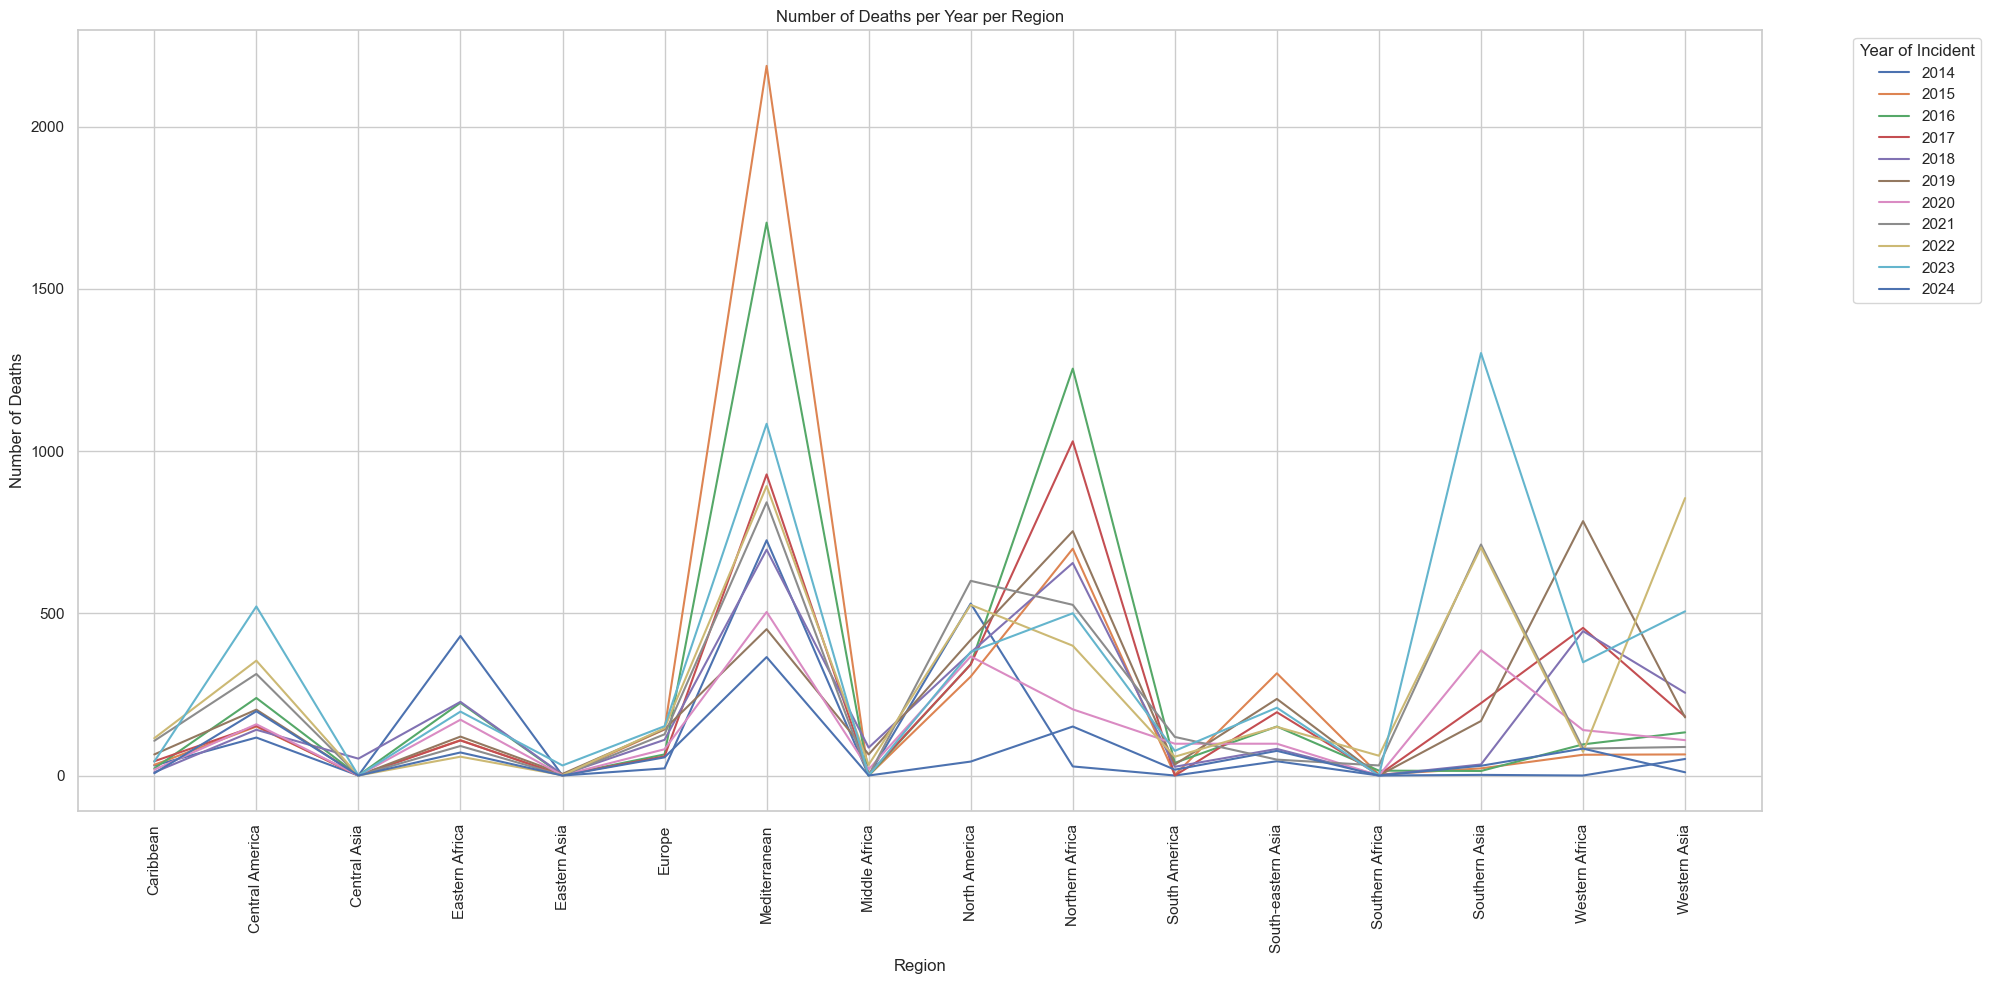

In [149]:
# Plotting Deaths per Country per Year
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")

for country in deaths_pivot_region.index:
    plt.plot(deaths_pivot_region.columns, deaths_pivot_region.loc[country], label=country)

plt.title('Number of Deaths per Year per Region')
plt.xlabel('Region')
plt.ylabel('Number of Deaths')
plt.legend(title='Year of Incident', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [150]:
# Split the Coordinates column into Latitude and Longitude
migrant_deaths_data[['Latitude', 'Longitude']] = migrant_deaths_data['Coordinates'].str.split(',', expand=True)
migrant_deaths_data['Latitude'] = pd.to_numeric(migrant_deaths_data['Latitude'])
migrant_deaths_data['Longitude'] = pd.to_numeric(migrant_deaths_data['Longitude'])

# Create the map
fig = px.scatter_mapbox(migrant_deaths_data, 
                        lat='Latitude', 
                        lon='Longitude', 
                        hover_name='Country of Incident', 
                        hover_data=['Incident Type', 'Total Number of Dead and Missing', 'Incident Date'],
                        color='Total Number of Dead and Missing',
                        color_continuous_scale='Viridis',
                        size='Total Number of Dead and Missing',
                        zoom=1,
                        height=600)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title='Map of Migration Incidents with Total Deaths and Missing',title_x=0.5)

fig.show()


In [186]:
# Exclude data from 2024
filtered_data = migrant_deaths_data[migrant_deaths_data['Incident Year'] != 2024]

# Aggregate the data
aggregated_data = filtered_data.groupby('Incident Year').agg(
    Number_of_Incidents=('Incident Year', 'size'),
    Total_Dead_and_Missing=('Total Number of Dead and Missing', 'sum')
).reset_index()

# Melt the data for Plotly
melted_data = aggregated_data.melt(id_vars='Incident Year', var_name='Metric', value_name='Count')

# Plotting with Plotly Express
fig = px.line(melted_data, 
              x='Incident Year', 
              y='Count', 
              color='Metric',
              title='Number of Incidents and Total Dead and Missing per Year',
              labels={'Incident Year': 'Year', 'Count': 'Count'})

# Update layout for better aesthetics
fig.update_layout(
    xaxis_title='Year', 
    yaxis_title='Count',
    template='plotly_white',
    width=800,
    height=500
)

fig.show()

## Perform EDA on Immigration Data

In [152]:
migrants_data = pd.read_excel("GLOBAL_DATAFLOW_1990-2024 (1).xlsx")

In [153]:
migrants_data.head()

Geographic area                            Indicator    Sex  TIME_PERIOD  \
0     Afghanistan  Internally displaced persons (IDPs)  Total         2008   
1     Afghanistan  Internally displaced persons (IDPs)  Total         2009   
2     Afghanistan  Internally displaced persons (IDPs)  Total         2010   
3     Afghanistan  Internally displaced persons (IDPs)  Total         2011   
4     Afghanistan  Internally displaced persons (IDPs)  Total         2012   

  OBS_VALUE Unit multiplier Unit of measure  Observation Status  \
0         0           Units         Persons                 NaN   
1    170000           Units         Persons                 NaN   
2    200000           Units         Persons                 NaN   
3    250000           Units         Persons                 NaN   
4    270000           Units         Persons                 NaN   

   Observation confidentaility  LOWER_BOUND  ...  WGTD_SAMPL_SIZE  \
0                          NaN          NaN  ...              NaN   
1                          NaN          NaN  ...              NaN   
2                          NaN          NaN  ...              NaN   
3                          NaN          NaN  ...              NaN   
4                          NaN          NaN  ...              NaN   

                                        OBS_FOOTNOTE SERIES_FOOTNOTE  \
0  From IDMC2023: GIDD, use country's child perce...             NaN   
1  From IDMC2023: GIDD, use country's child perce...             NaN   
2  From IDMC2023: GIDD, use country's child perce...             NaN   
3  From IDMC2023: GIDD, use country's child perce...             NaN   
4  From IDMC2023: GIDD, use country's child perce...             NaN   

                                         DATA_SOURCE  \
0  Internal Displacement Monitoring Centre, Globa...   
1  Internal Displacement Monitoring Centre, Globa...   
2  Internal Displacement Monitoring Centre, Globa...   
3  Internal Displacement Monitoring Centre, Globa...   
4  Internal Displacement Monitoring Centre, Globa...   

                                         SOURCE_LINK CUSTODIAN  \
0  https://www.internal-displacement.org/database...       NaN   
1  https://www.internal-displacement.org/database...       NaN   
2  https://www.internal-displacement.org/database...       NaN   
3  https://www.internal-displacement.org/database...       NaN   
4  https://www.internal-displacement.org/database...       NaN   

   Time period activity related to when the data are collected  REF_PERIOD  \
0                                                NaN                   NaN   
1                                                NaN                   NaN   
2                                                NaN                   NaN   
3                                                NaN                   NaN   
4                                                NaN                   NaN   

   COVERAGE_TIME         Current age  
0            NaN  Under 18 years old  
1            NaN  Under 18 years old  
2            NaN  Under 18 years old  
3            NaN  Under 18 years old  
4            NaN  Under 18 years old  

[5 rows x 21 columns]

In [154]:
migrants_data['Indicator'].value_counts()

Indicator
Internally displaced persons (IDPs)                   2154
New internal displacements                            2154
International migrants, by country of destination     1742
Refugees, by country of origin                         221
Refugees, by country of asylum                         197
Refugees by host country, per 1000 population          197
Refugees by host country, per 1 USD GNI per capita     195
Refugees under UNRWA mandate, by host country           28
Name: count, dtype: int64

In [155]:
migrants_data['Geographic area'].value_counts()

Geographic area
Middle East and North Africa                    90
East Asia and Pacific                           82
Latin America and the Caribbean                 82
South Asia                                      82
Eastern and Southern Africa                     82
                                                ..
Montserrat                                       7
Saint Helena, Ascension and Tristan da Cunha     7
Saint Pierre and Miquelon                        7
San Marino                                       7
Channel Islands                                  7
Name: count, Length: 245, dtype: int64

In [156]:
migrants_data.columns

Index(['Geographic area', 'Indicator', 'Sex', 'TIME_PERIOD', 'OBS_VALUE',
       'Unit multiplier', 'Unit of measure', 'Observation Status',
       'Observation confidentaility', 'LOWER_BOUND', 'UPPER_BOUND',
       'WGTD_SAMPL_SIZE', 'OBS_FOOTNOTE', 'SERIES_FOOTNOTE', 'DATA_SOURCE',
       'SOURCE_LINK', 'CUSTODIAN',
       'Time period activity related to when the data are collected',
       'REF_PERIOD', 'COVERAGE_TIME', 'Current age'],
      dtype='object')

In [157]:
migrants_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6888 entries, 0 to 6887
Data columns (total 21 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Geographic area                                              6888 non-null   object 
 1   Indicator                                                    6888 non-null   object 
 2   Sex                                                          6888 non-null   object 
 3   TIME_PERIOD                                                  6888 non-null   int64  
 4   OBS_VALUE                                                    6888 non-null   object 
 5   Unit multiplier                                              4342 non-null   object 
 6   Unit of measure                                              6888 non-null   object 
 7   Observation Status                                           0 non-null      f

In [158]:
migrants_data['OBS_VALUE'] = pd.to_numeric(migrants_data['OBS_VALUE'], errors='coerce')

In [159]:
migrants_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6888 entries, 0 to 6887
Data columns (total 21 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Geographic area                                              6888 non-null   object 
 1   Indicator                                                    6888 non-null   object 
 2   Sex                                                          6888 non-null   object 
 3   TIME_PERIOD                                                  6888 non-null   int64  
 4   OBS_VALUE                                                    6734 non-null   float64
 5   Unit multiplier                                              4342 non-null   object 
 6   Unit of measure                                              6888 non-null   object 
 7   Observation Status                                           0 non-null      f

In [160]:
migrants = migrants_data.drop(['Observation Status','Observation confidentaility','LOWER_BOUND','UPPER_BOUND','WGTD_SAMPL_SIZE','SERIES_FOOTNOTE',
                    'DATA_SOURCE','SOURCE_LINK','CUSTODIAN', 'Time period activity related to when the data are collected','REF_PERIOD',
                    'COVERAGE_TIME','OBS_FOOTNOTE'],axis=1)

In [161]:
migrants

Geographic area                                          Indicator  \
0        Afghanistan                Internally displaced persons (IDPs)   
1        Afghanistan                Internally displaced persons (IDPs)   
2        Afghanistan                Internally displaced persons (IDPs)   
3        Afghanistan                Internally displaced persons (IDPs)   
4        Afghanistan                Internally displaced persons (IDPs)   
...              ...                                                ...   
6883        Zimbabwe                         New internal displacements   
6884        Zimbabwe                     Refugees, by country of asylum   
6885        Zimbabwe      Refugees by host country, per 1000 population   
6886        Zimbabwe  Refugees by host country, per 1 USD GNI per ca...   
6887        Zimbabwe                     Refugees, by country of origin   

        Sex  TIME_PERIOD  OBS_VALUE Unit multiplier           Unit of measure  \
0     Total         2008        0.0           Units                   Persons   
1     Total         2009   170000.0           Units                   Persons   
2     Total         2010   200000.0           Units                   Persons   
3     Total         2011   250000.0           Units                   Persons   
4     Total         2012   270000.0           Units                   Persons   
...     ...          ...        ...             ...                       ...   
6883  Total         2022      600.0             NaN                    Number   
6884  Total         2022     5109.0           Units                   Persons   
6885  Total         2022        1.0             NaN                  Per 1000   
6886  Total         2022        7.0             NaN  per 1 USD GNI per capita   
6887  Total         2022     1055.0           Units                   Persons   

             Current age  
0     Under 18 years old  
1     Under 18 years old  
2     Under 18 years old  
3     Under 18 years old  
4     Under 18 years old  
...                  ...  
6883  Under 18 years old  
6884  Under 18 years old  
6885               Total  
6886               Total  
6887  Under 18 years old  

[6888 rows x 8 columns]

In [162]:
migrants.columns

Index(['Geographic area', 'Indicator', 'Sex', 'TIME_PERIOD', 'OBS_VALUE',
       'Unit multiplier', 'Unit of measure', 'Current age'],
      dtype='object')

In [163]:
# Ensure TIME_PERIOD is treated as a categorical variable
migrants_data['TIME_PERIOD'] = migrants_data['TIME_PERIOD'].astype(str)

# Filter the DataFrame to include only rows where 'Indicator' is 'Internally displaced persons'
filter_idp_data = migrants_data[migrants_data['Indicator'] == 'Internally displaced persons (IDPs)']

# Pivot the DataFrame to have 'Geographic area' as index and 'TIME_PERIOD' as columns
idp_data = filter_idp_data.pivot_table(index='Geographic area', columns='TIME_PERIOD', values='OBS_VALUE', aggfunc='sum').fillna(0)

# Add a column with the sum per 'Geographic area'
idp_data['Total'] = idp_data.sum(axis=1)

# Reset index to turn 'Geographic area' back into a column
idp_data.reset_index(inplace=True)

# Display the new DataFrame
idp_data


TIME_PERIOD Geographic area  2008        2009        2010       2011  \
0               Afghanistan   0.0    170000.0    200000.0   250000.0   
1                   Albania   0.0         0.0         0.0        0.0   
2                   Algeria   0.0         0.0         0.0        0.0   
3            American Samoa   0.0         0.0         0.0        0.0   
4                    Angola   0.0         0.0         0.0        0.0   
..                      ...   ...         ...         ...        ...   
212          Western Europe   0.0     44000.0     44000.0    43000.0   
213                   World   0.0  11000000.0  11000000.0  9300000.0   
214                   Yemen   0.0     90000.0    120000.0   230000.0   
215                  Zambia   0.0         0.0         0.0        0.0   
216                Zimbabwe   0.0         0.0         0.0        0.0   

TIME_PERIOD        2012        2013        2014        2015        2016  \
0              270000.0    340000.0    430000.0    620000.0    630000.0   
1                   0.0         0.0         0.0         0.0         0.0   
2                   0.0         0.0         0.0         0.0       860.0   
3                   0.0         0.0         0.0         0.0         0.0   
4                   0.0         0.0         0.0         0.0         0.0   
..                  ...         ...         ...         ...         ...   
212             42000.0     42000.0     42000.0     53000.0     52000.0   
213          11000000.0  14000000.0  16000000.0  17000000.0  17000000.0   
214            190000.0    150000.0    160000.0   1200000.0    950000.0   
215                 0.0         0.0         0.0         0.0         0.0   
216                 0.0         0.0         0.0         0.0         0.0   

TIME_PERIOD        2017        2018        2019        2020        2021  \
0              670000.0   1300000.0   2200000.0   2400000.0   2900000.0   
1                   0.0         0.0      6700.0      3500.0         0.0   
2                   0.0         0.0         0.0         8.1      1300.0   
3                   0.0         0.0         0.0         3.6         0.0   
4                   0.0         0.0       560.0       410.0      3900.0   
..                  ...         ...         ...         ...         ...   
212             42000.0     44000.0     44000.0     44000.0     48000.0   
213          17000000.0  18000000.0  22000000.0  24000000.0  26000000.0   
214            960000.0   1100000.0   1700000.0   1800000.0   2000000.0   
215                 0.0         0.0        27.0       520.0       110.0   
216                 0.0         0.0       390.0     10000.0     21000.0   

TIME_PERIOD        2022        Total  
0             3300000.0   15680000.0  
1                   0.0      10200.0  
2                 530.0       2698.1  
3                   8.4         12.0  
4                   0.0       4870.0  
..                  ...          ...  
212             47000.0     631000.0  
213          30000000.0  243300000.0  
214           2100000.0   12750000.0  
215              1800.0       2457.0  
216                 0.0      31390.0  

[217 rows x 17 columns]

In [164]:


# Filter the DataFrame to include only rows where 'Indicator' is 'Internally displaced persons'
filter_int_migrants_data = migrants_data[migrants_data['Indicator'] == 'International migrants, by country of destination']

# Pivot the DataFrame to have 'Geographic area' as index and 'TIME_PERIOD' as columns
int_migrants_data = filter_int_migrants_data.pivot_table(index='Geographic area', columns='TIME_PERIOD', values='OBS_VALUE', aggfunc='sum').fillna(0)

# Add a column with the sum per 'Geographic area'
int_migrants_data['Total'] = int_migrants_data.sum(axis=1)

# Reset index to turn 'Geographic area' back into a column
int_migrants_data.reset_index(inplace=True)

# Display the new DataFrame
int_migrants_data

TIME_PERIOD Geographic area     1990     1995     2000     2005     2010  \
0               Afghanistan     15.0     18.0     19.0     22.0     25.0   
1                   Albania     14.0     21.0     29.0     29.0     28.0   
2                   Algeria     63.0     58.0     53.0     41.0     43.0   
3            American Samoa      6.0      5.0      5.0      4.0      4.0   
4                   Andorra      6.0      5.0      3.0      3.0      3.0   
..                      ...      ...      ...      ...      ...      ...   
239          Western Europe   3251.0   3473.0   3735.0   4190.0   4502.0   
240                   World  24855.0  24045.0  23936.0  25612.0  27816.0   
241                   Yemen     54.0     55.0     50.0     55.0     84.0   
242                  Zambia     85.0     74.0    107.0     72.0     39.0   
243                Zimbabwe    144.0     98.0     78.0     72.0     67.0   

TIME_PERIOD     2015     2020     Total  
0              139.0     54.0     292.0  
1               26.0     24.0     171.0  
2               40.0     34.0     332.0  
3                3.0      2.0      29.0  
4                3.0      3.0      26.0  
..               ...      ...       ...  
239           4426.0   5633.0   29210.0  
240          29906.0  35515.0  191685.0  
241            110.0    117.0     525.0  
242             25.0     34.0     436.0  
243             56.0     53.0     568.0  

[244 rows x 9 columns]

In [165]:
# Filter the DataFrame to include only rows where 'Indicator' is 'Internally displaced persons'
filter_ref_org_data = migrants_data[migrants_data['Indicator'] == 'Refugees, by country of origin']

# Pivot the DataFrame to have 'Geographic area' as index and 'TIME_PERIOD' as columns
ref_org_data = filter_ref_org_data.pivot_table(index='Geographic area', columns='TIME_PERIOD', values='OBS_VALUE', aggfunc='sum').fillna(0)

# Add a column with the sum per 'Geographic area'
ref_org_data['Total'] = ref_org_data.sum(axis=1)

# Reset index to turn 'Geographic area' back into a column
ref_org_data.reset_index(inplace=True)

# Display the new DataFrame
ref_org_data

TIME_PERIOD Geographic area        2022       Total
0               Afghanistan   2609461.0   2609461.0
1                   Albania     20847.0     20847.0
2                   Algeria      7703.0      7703.0
3                   Andorra         5.0         5.0
4                    Angola     11751.0     11751.0
..                      ...         ...         ...
209          Western Europe      1009.0      1009.0
210                   World  14166379.0  14166379.0
211                   Yemen     10797.0     10797.0
212                  Zambia       295.0       295.0
213                Zimbabwe      1055.0      1055.0

[214 rows x 3 columns]

In [166]:
# Filter the DataFrame to include only rows where 'Indicator' is 'Internally displaced persons'
filter_asylum_data = migrants_data[migrants_data['Indicator'] == 'Refugees, by country of asylum']

# Pivot the DataFrame to have 'Geographic area' as index and 'TIME_PERIOD' as columns
asylum_data = filter_asylum_data.pivot_table(index='Geographic area', columns='TIME_PERIOD', values='OBS_VALUE', aggfunc='sum').fillna(0)

# Add a column with the sum per 'Geographic area'
asylum_data['Total'] = asylum_data.sum(axis=1)

# Reset index to turn 'Geographic area' back into a column
asylum_data.reset_index(inplace=True)

# Display the new DataFrame
asylum_data

TIME_PERIOD Geographic area        2022       Total
0               Afghanistan     29356.0     29356.0
1                   Albania      2676.0      2676.0
2                   Algeria     99107.0     99107.0
3                    Angola     13578.0     13578.0
4                  Anguilla         0.0         0.0
..                      ...         ...         ...
185          Western Europe   2251382.0   2251382.0
186                   World  14166379.0  14166379.0
187                   Yemen     20005.0     20005.0
188                  Zambia     28740.0     28740.0
189                Zimbabwe      5109.0      5109.0

[190 rows x 3 columns]

# NN Prediction Model

## Prepare the data

In [167]:
# Create a table that has al the relevant data 
# (Country, IDP, New IDP, Migrant Deaths, Conflicts, Death from Conflicts, Refugees Origin Country)

In [168]:
# Replace problematic values in OBS_VALUE
migrants_data['OBS_VALUE'] = migrants_data['OBS_VALUE'].replace('<1', '0.5')

# Ensure OBS_VALUE is of numeric type, forcing errors to NaN
migrants_data['OBS_VALUE'] = pd.to_numeric(migrants_data['OBS_VALUE'], errors='coerce')

# Drop rows where OBS_VALUE could not be converted and are NaN
migrants_data = migrants_data.dropna(subset=['OBS_VALUE'])

# Print a sample of the data to inspect
print(migrants_data.head())

# Pivot the table with sum aggregation
pivoted_df = migrants_data.pivot_table(
    index='Geographic area',
    columns='Indicator',
    values='OBS_VALUE',
    aggfunc='sum'  # Use sum to aggregate the values
)

# Flatten the columns multi-index if needed
pivoted_df.columns = [col for col in pivoted_df.columns]

# Drop the specified indicator column
indicator_to_drop = 'Refugees under UNRWA mandate, by host country'
if indicator_to_drop in pivoted_df.columns:
    pivoted_df = pivoted_df.drop(columns=[indicator_to_drop])

# Drop rows with any null values
pivoted_df = pivoted_df.dropna()

# Display the new DataFrame
pivoted_df


  Geographic area                            Indicator    Sex TIME_PERIOD  \
0     Afghanistan  Internally displaced persons (IDPs)  Total        2008   
1     Afghanistan  Internally displaced persons (IDPs)  Total        2009   
2     Afghanistan  Internally displaced persons (IDPs)  Total        2010   
3     Afghanistan  Internally displaced persons (IDPs)  Total        2011   
4     Afghanistan  Internally displaced persons (IDPs)  Total        2012   

   OBS_VALUE Unit multiplier Unit of measure  Observation Status  \
0        0.0           Units         Persons                 NaN   
1   170000.0           Units         Persons                 NaN   
2   200000.0           Units         Persons                 NaN   
3   250000.0           Units         Persons                 NaN   
4   270000.0           Units         Persons                 NaN   

   Observation confidentaility  LOWER_BOUND  ...  WGTD_SAMPL_SIZE  \
0                          NaN          NaN  ...           

Internally displaced persons (IDPs)  \
Geographic area                                            
Afghanistan                                   15680000.0   
Albania                                          10200.0   
Algeria                                           2698.1   
Angola                                            4870.0   
Antigua and Barbuda                                  0.0   
...                                                  ...   
Western Europe                                  631000.0   
World                                        243300000.0   
Yemen                                         12750000.0   
Zambia                                            2457.0   
Zimbabwe                                         31390.0   

                     International migrants, by country of destination  \
Geographic area                                                          
Afghanistan                                                      292.0   
Albania                                                          171.0   
Algeria                                                          332.0   
Angola                                                           367.0   
Antigua and Barbuda                                               26.0   
...                                                                ...   
Western Europe                                                 29210.0   
World                                                         191685.0   
Yemen                                                            525.0   
Zambia                                                           436.0   
Zimbabwe                                                         568.0   

                     New internal displacements  \
Geographic area                                   
Afghanistan                           2740900.0   
Albania                                  9482.6   
Algeria                                 26556.6   
Angola                                 264810.0   
Antigua and Barbuda                       363.0   
...                                         ...   
Western Europe                         144500.0   
World                               182000000.0   
Yemen                                 2743000.0   
Zambia                                  57324.0   
Zimbabwe                                75360.0   

                     Refugees by host country, per 1 USD GNI per capita  \
Geographic area                                                           
Afghanistan                                                      104.0    
Albania                                                            0.0    
Algeria                                                           27.0    
Angola                                                            14.0    
Antigua and Barbuda                                                0.0    
...                                                                ...    
Western Europe                                                   169.0    
World                                                           2462.0    
Yemen                                                            116.0    
Zambia                                                            59.0    
Zimbabwe                                                           7.0    

                     Refugees by host country, per 1000 population  \
Geographic area                                                      
Afghanistan                                                    1.0   
Albania                                                        1.0   
Algeria                                                        2.0   
Angola                                                         1.0   
Antigua and Barbuda                                            0.0   
...                                                            ...   
Western Europe                                                14.0   
World  

In [169]:
pivoted_df.columns

Index(['Internally displaced persons (IDPs)',
       'International migrants, by country of destination',
       'New internal displacements',
       'Refugees by host country, per 1 USD GNI per capita',
       'Refugees by host country, per 1000 population',
       'Refugees, by country of asylum', 'Refugees, by country of origin'],
      dtype='object')

In [170]:
# First, reset the index of pivoted_df to prepare for merging
pivoted_df.reset_index(inplace=True)

# Check and handle potential column name conflicts
if 'level_0' in pivoted_df.columns:
    pivoted_df.drop(columns=['level_0'], inplace=True)

# Merge pivoted_df with conflicts_data on 'Geographic area' and 'country' columns
merged_df1 = pivoted_df.merge(conflicts_data, left_on='Geographic area', right_on='country', how='inner')

# Merge the result with migrants_death_data on 'Geographic area' and 'Country of Origin' columns
merged_df_final = merged_df1.merge(migrant_deaths_data, left_on='Geographic area', right_on='Country of Origin', how='inner')

# Display the final merged DataFrame
merged_df_final


Geographic area  Internally displaced persons (IDPs)  \
0          Afghanistan                           15680000.0   
1          Afghanistan                           15680000.0   
2          Afghanistan                           15680000.0   
3          Afghanistan                           15680000.0   
4          Afghanistan                           15680000.0   
...                ...                                  ...   
183449        Zimbabwe                              31390.0   
183450        Zimbabwe                              31390.0   
183451        Zimbabwe                              31390.0   
183452        Zimbabwe                              31390.0   
183453        Zimbabwe                              31390.0   

        International migrants, by country of destination  \
0                                                   292.0   
1                                                   292.0   
2                                                   292.0   
3                                                   292.0   
4                                                   292.0   
...                                                   ...   
183449                                              568.0   
183450                                              568.0   
183451                                              568.0   
183452                                              568.0   
183453                                              568.0   

        New internal displacements  \
0                        2740900.0   
1                        2740900.0   
2                        2740900.0   
3                        2740900.0   
4                        2740900.0   
...                            ...   
183449                     75360.0   
183450                     75360.0   
183451                     75360.0   
183452                     75360.0   
183453                     75360.0   

        Refugees by host country, per 1 USD GNI per capita  \
0                                                   104.0    
1                                                   104.0    
2                                                   104.0    
3                                                   104.0    
4                                                   104.0    
...                                                   ...    
183449                                                7.0    
183450                                                7.0    
183451                                                7.0    
183452                                                7.0    
183453                                                7.0    

        Refugees by host country, per 1000 population  \
0                                                 1.0   
1                                                 1.0   
2                                                 1.0   
3                                                 1.0   
4                                                 1.0   
...                                               ...   
183449                                            1.0   
183450                                            1.0   
183451                                            1.0   
183452                                            1.0   
183453                                            1.0   

        Refugees, by country of asylum  Refugees, by country of origin  gwno  \
0                              29356.0                       2609461.0   700   
1                              29356.0                       2609461.0   700   
2                              29356.0                       2609461.0   700   
3                              29356.0                       2609461.0   700   
4                              29356.0                       2609461.0   700   
...                                ...                             ...   ...   
183449                          5109.0                          1055.0

In [171]:
merged_df_final.columns

Index(['Geographic area', 'Internally displaced persons (IDPs)',
       'International migrants, by country of destination',
       'New internal displacements',
       'Refugees by host country, per 1 USD GNI per capita',
       'Refugees by host country, per 1000 population',
       'Refugees, by country of asylum', 'Refugees, by country of origin',
       'gwno', 'country', 'year', 'ongoing', 'gwarea_tot', 'gwsum_bestdeaths',
       'gwsum_best_sb', 'gwshare_confl', 'gwpop', 'gwpop_confl',
       'gwpopshare_confl', 'maxintensity', 'maxcumulativeintensity',
       'peaceyears', 'peaceyearshigh', 'postconflict', 'pop_affected',
       'area_affected', 'coordinates', 'Main ID', 'Incident ID',
       'Incident Type', 'Region of Incident', 'Incident Date', 'Incident Year',
       'Month', 'Number of Dead', 'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'C

In [172]:
merged_df_final = merged_df_final.drop(['Information Source','Source Quality','URL','Main ID','Incident ID',
                                        'Refugees by host country, per 1 USD GNI per capita','gwno', 'Incident Year', 'year',
                                         'Refugees by host country, per 1000 population','Month','Cause of Death',
                                       'Country of Incident','Migration Route','Location of Incident', 'Region of Incident',
                                        'UNSD Geographical Grouping', 'Incident Type',
                                       'Coordinates','Incident Date'],axis=1)
merged_df_final.columns

Index(['Geographic area', 'Internally displaced persons (IDPs)',
       'International migrants, by country of destination',
       'New internal displacements', 'Refugees, by country of asylum',
       'Refugees, by country of origin', 'country', 'ongoing', 'gwarea_tot',
       'gwsum_bestdeaths', 'gwsum_best_sb', 'gwshare_confl', 'gwpop',
       'gwpop_confl', 'gwpopshare_confl', 'maxintensity',
       'maxcumulativeintensity', 'peaceyears', 'peaceyearshigh',
       'postconflict', 'pop_affected', 'area_affected', 'coordinates',
       'Number of Dead', 'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Country of Origin', 'Region of Origin', 'Latitude', 'Longitude'],
      dtype='object')

In [173]:
merged_df_final = merged_df_final.drop(['Region of Origin'],axis=1)
merged_df_final.columns

Index(['Geographic area', 'Internally displaced persons (IDPs)',
       'International migrants, by country of destination',
       'New internal displacements', 'Refugees, by country of asylum',
       'Refugees, by country of origin', 'country', 'ongoing', 'gwarea_tot',
       'gwsum_bestdeaths', 'gwsum_best_sb', 'gwshare_confl', 'gwpop',
       'gwpop_confl', 'gwpopshare_confl', 'maxintensity',
       'maxcumulativeintensity', 'peaceyears', 'peaceyearshigh',
       'postconflict', 'pop_affected', 'area_affected', 'coordinates',
       'Number of Dead', 'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Country of Origin', 'Latitude', 'Longitude'],
      dtype='object')

In [174]:
merged_df_final = merged_df_final.drop(['ongoing'],axis=1)
merged_df_final.columns

Index(['Geographic area', 'Internally displaced persons (IDPs)',
       'International migrants, by country of destination',
       'New internal displacements', 'Refugees, by country of asylum',
       'Refugees, by country of origin', 'country', 'gwarea_tot',
       'gwsum_bestdeaths', 'gwsum_best_sb', 'gwshare_confl', 'gwpop',
       'gwpop_confl', 'gwpopshare_confl', 'maxintensity',
       'maxcumulativeintensity', 'peaceyears', 'peaceyearshigh',
       'postconflict', 'pop_affected', 'area_affected', 'coordinates',
       'Number of Dead', 'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Country of Origin', 'Latitude', 'Longitude'],
      dtype='object')

In [175]:
merged_df_final = merged_df_final.drop(['gwsum_best_sb','gwshare_confl','gwpop','gwpop_confl','gwpopshare_confl','maxintensity',
                                       'maxcumulativeintensity','postconflict', 'pop_affected', 'area_affected'],axis=1)
merged_df_final.columns

Index(['Geographic area', 'Internally displaced persons (IDPs)',
       'International migrants, by country of destination',
       'New internal displacements', 'Refugees, by country of asylum',
       'Refugees, by country of origin', 'country', 'gwarea_tot',
       'gwsum_bestdeaths', 'peaceyears', 'peaceyearshigh', 'coordinates',
       'Number of Dead', 'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Country of Origin', 'Latitude', 'Longitude'],
      dtype='object')

In [176]:
merged_df_final.head(15)

Geographic area  Internally displaced persons (IDPs)  \
0      Afghanistan                           15680000.0   
1      Afghanistan                           15680000.0   
2      Afghanistan                           15680000.0   
3      Afghanistan                           15680000.0   
4      Afghanistan                           15680000.0   
5      Afghanistan                           15680000.0   
6      Afghanistan                           15680000.0   
7      Afghanistan                           15680000.0   
8      Afghanistan                           15680000.0   
9      Afghanistan                           15680000.0   
10     Afghanistan                           15680000.0   
11     Afghanistan                           15680000.0   
12     Afghanistan                           15680000.0   
13     Afghanistan                           15680000.0   
14     Afghanistan                           15680000.0   

    International migrants, by country of destination  \
0                                               292.0   
1                                               292.0   
2                                               292.0   
3                                               292.0   
4                                               292.0   
5                                               292.0   
6                                               292.0   
7                                               292.0   
8                                               292.0   
9                                               292.0   
10                                              292.0   
11                                              292.0   
12                                              292.0   
13                                              292.0   
14                                              292.0   

    New internal displacements  Refugees, by country of asylum  \
0                    2740900.0                         29356.0   
1                    2740900.0                         29356.0   
2                    2740900.0                         29356.0   
3                    2740900.0                         29356.0   
4                    2740900.0                         29356.0   
5                    2740900.0                         29356.0   
6                    2740900.0                         29356.0   
7                    2740900.0                         29356.0   
8                    2740900.0                         29356.0   
9                    2740900.0                         29356.0   
10                   2740900.0                         29356.0   
11                   2740900.0                         29356.0   
12                   2740900.0                         29356.0   
13                   2740900.0                         29356.0   
14                   2740900.0                         29356.0   

    Refugees, by country of origin      country     gwarea_tot  \
0                        2609461.0  Afghanistan  688213.070225   
1                        2609461.0  Afghanistan  688213.070225   
2                        2609461.0  Afghanistan  688213.070225   
3                        2609461.0  Afghanistan  688213.070225   
4                        2609461.0  Afghanistan  688213.070225   
5                        2609461.0  Afghanistan  688213.070225   
6                        2609461.0  Afghanistan  688213.070225   
7                        2609461.0  Afghanistan  688213.070225   
8                        2609461.0  Afghanistan  688213.070225   
9                        2609461.0  Afghanistan  688213.070225   
10                       2609461.0  Afghanistan  688213.070225   
11                       2609461.0  Afghanistan  688213.070225   
12                       2609461.0  Afghanistan  688213.070225   
13                       2609461.0  Afghanistan  688213.070225   
14                       2609461.0  Afghanistan  688213.070225   

    gwsum_bestdeaths  peaceyear

In [177]:
# Select numeric columns and the 'Geographic area' column
numeric_columns = [
    'gwarea_tot', 'gwsum_bestdeaths', 'peaceyears', 'peaceyearshigh', 
    'Number of Dead', 'Minimum Estimated Number of Missing', 
    'Total Number of Dead and Missing', 'Number of Survivors', 
    'Number of Females', 'Number of Males', 'Number of Children'
]

# Define aggregation functions for numeric and non-numeric columns
agg_dict = {col: 'sum' for col in numeric_columns}
# Add 'first' aggregation for other columns you want to keep
for col in merged_df_final.columns:
    if col not in numeric_columns + ['Geographic area']:
        agg_dict[col] = 'first'  # or use 'mode' or another function as needed

# Group by 'Geographic area' and aggregate using the defined functions
grouped_df = merged_df_final.groupby('Geographic area').agg(agg_dict).reset_index()

# Display the grouped DataFrame
grouped_df

Geographic area    gwarea_tot  gwsum_bestdeaths    peaceyears  \
0      Afghanistan  5.073468e+10      3.404745e+08  1.578316e+06   
1          Albania  8.013004e+06      2.580401e+03  9.100000e+02   
2          Algeria  6.778218e+09      1.441371e+06  8.244238e+04   
3           Angola  8.562977e+07      2.032320e+04  1.097129e+03   
4       Bangladesh  3.849642e+08      1.268961e+05  9.412374e+03   
..             ...           ...               ...           ...   
68         Ukraine  2.082414e+08      1.049391e+05  4.077511e+03   
69         Uruguay  1.049639e+07      2.580401e+03  8.260000e+02   
70      Uzbekistan  2.650125e+07      4.922475e+03  3.153093e+02   
71           Yemen  2.270999e+08      2.912610e+05  4.694460e+03   
72        Zimbabwe  8.383459e+07      1.701241e+04  3.780000e+03   

    peaceyearshigh  Number of Dead  Minimum Estimated Number of Missing  \
0     1.857572e+06         92428.0                               1848.0   
1     9.100000e+02            28.0                                  0.0   
2     9.602173e+04          6160.0                              19628.0   
3     1.453571e+03            28.0                                 84.0   
4     1.567092e+04          2240.0                               3640.0   
..             ...             ...                                  ...   
68    4.217025e+03           442.0                                182.0   
69    9.100000e+02            28.0                                 28.0   
70    7.327730e+02          1378.0                                  0.0   
71    5.177393e+03           364.0                                 84.0   
72    3.780000e+03           756.0                                 84.0   

    Total Number of Dead and Missing  Number of Survivors  Number of Females  \
0                              94276              40124.0             5796.0   
1                                 28                  0.0                0.0   
2                              25788              18004.0             1064.0   
3                                112                  0.0               56.0   
4                               5880              18564.0               28.0   
..                               ...                  ...                ...   
68                               624                884.0              156.0   
69                                56                 28.0               28.0   
70                              1378                130.0                0.0   
71                               448                280.0                0.0   
72                               840                140.0               28.0   

    ...  Internally displaced persons (IDPs)  \
0   ...                           15680000.0   
1   ...                              10200.0   
2   ...                               2698.1   
3   ...                               4870.0   
4   ...                            2300000.0   
..  ...                                  ...   
68  ...                            2520000.0   
69  ...                                  0.0   
70  ...                               7200.0   
71  ...                           12750000.0   
72  ...                              31390.0   

    International migrants, by country of destination  \
0                                               292.0   
1                                               171.0   
2                                               332.0   
3                                               367.0   
4                                              1857.0   
..                                                ...   
68                                             3035.0   
69                                              103.0   
70                                              926.0   
71                                              525.0   
72                                              568.0   

    New internal displacements  Refugees, by country of asylum

In [178]:
final_df = grouped_df.drop(['country','Country of Origin'],axis=1)
final_df

Geographic area    gwarea_tot  gwsum_bestdeaths    peaceyears  \
0      Afghanistan  5.073468e+10      3.404745e+08  1.578316e+06   
1          Albania  8.013004e+06      2.580401e+03  9.100000e+02   
2          Algeria  6.778218e+09      1.441371e+06  8.244238e+04   
3           Angola  8.562977e+07      2.032320e+04  1.097129e+03   
4       Bangladesh  3.849642e+08      1.268961e+05  9.412374e+03   
..             ...           ...               ...           ...   
68         Ukraine  2.082414e+08      1.049391e+05  4.077511e+03   
69         Uruguay  1.049639e+07      2.580401e+03  8.260000e+02   
70      Uzbekistan  2.650125e+07      4.922475e+03  3.153093e+02   
71           Yemen  2.270999e+08      2.912610e+05  4.694460e+03   
72        Zimbabwe  8.383459e+07      1.701241e+04  3.780000e+03   

    peaceyearshigh  Number of Dead  Minimum Estimated Number of Missing  \
0     1.857572e+06         92428.0                               1848.0   
1     9.100000e+02            28.0                                  0.0   
2     9.602173e+04          6160.0                              19628.0   
3     1.453571e+03            28.0                                 84.0   
4     1.567092e+04          2240.0                               3640.0   
..             ...             ...                                  ...   
68    4.217025e+03           442.0                                182.0   
69    9.100000e+02            28.0                                 28.0   
70    7.327730e+02          1378.0                                  0.0   
71    5.177393e+03           364.0                                 84.0   
72    3.780000e+03           756.0                                 84.0   

    Total Number of Dead and Missing  Number of Survivors  Number of Females  \
0                              94276              40124.0             5796.0   
1                                 28                  0.0                0.0   
2                              25788              18004.0             1064.0   
3                                112                  0.0               56.0   
4                               5880              18564.0               28.0   
..                               ...                  ...                ...   
68                               624                884.0              156.0   
69                                56                 28.0               28.0   
70                              1378                130.0                0.0   
71                               448                280.0                0.0   
72                               840                140.0               28.0   

    Number of Males  Number of Children  Internally displaced persons (IDPs)  \
0           69608.0              9772.0                           15680000.0   
1              28.0                 0.0                              10200.0   
2            6216.0               896.0                               2698.1   
3               0.0                56.0                               4870.0   
4            1400.0                56.0                            2300000.0   
..              ...                 ...                                  ...   
68            338.0                26.0                            2520000.0   
69              0.0                28.0                                  0.0   
70             26.0                 0.0                               7200.0   
71            448.0                 0.0                           12750000.0   
72            252.0                28.0                              31390.0   

    International migrants, by country of destination  \
0                                               292.0   
1                                               171.0   
2                                               332.0   
3                                               367.0   
4                                              1857.0   
..                   

In [179]:
final_df.columns

Index(['Geographic area', 'gwarea_tot', 'gwsum_bestdeaths', 'peaceyears',
       'peaceyearshigh', 'Number of Dead',
       'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Internally displaced persons (IDPs)',
       'International migrants, by country of destination',
       'New internal displacements', 'Refugees, by country of asylum',
       'Refugees, by country of origin', 'coordinates', 'Latitude',
       'Longitude'],
      dtype='object')

In [180]:
final_df.to_csv('final_df.csv', index=False)

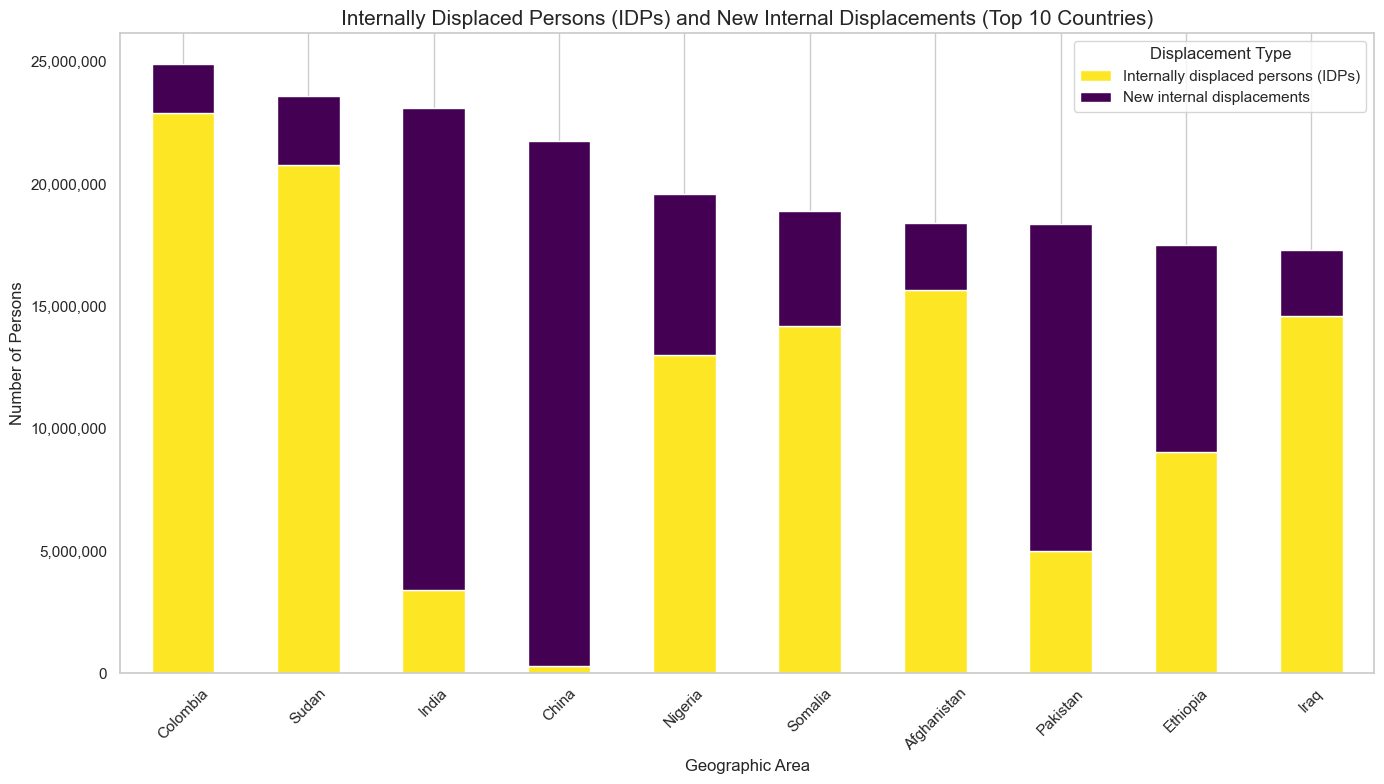

In [181]:
from matplotlib.ticker import FuncFormatter

# Set 'Geographic area' as the index
final_df.set_index('Geographic area', inplace=True)

# Columns to visualize
columns_to_visualize = ['Internally displaced persons (IDPs)', 'New internal displacements']

# Calculate total displacements and select top 10 countries
final_df['Total Displacements'] = final_df[columns_to_visualize].sum(axis=1)
top_10_countries = final_df.nlargest(10, 'Total Displacements')

# Define a formatter function to remove scientific notation e
def plain_formatter(x, pos):
    return f'{int(x):,}'

# Get the reversed viridis colormap
reversed_viridis = plt.cm.viridis(np.linspace(0, 1, len(columns_to_visualize))[::-1])

# Plot the stacked bar plot
top_10_countries[columns_to_visualize].plot(kind='bar', stacked=True, figsize=(14, 8), 
                                            color=reversed_viridis)

plt.title('Internally Displaced Persons (IDPs) and New Internal Displacements (Top 10 Countries)', fontsize=15)
plt.xlabel('Geographic Area', fontsize=12)
plt.ylabel('Number of Persons', fontsize=12)
plt.legend(title='Displacement Type')
plt.grid(axis='y')
plt.gca().yaxis.set_major_formatter(FuncFormatter(plain_formatter))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [182]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


features = ['gwarea_tot', 'gwsum_bestdeaths', 'peaceyears',
       'peaceyearshigh', 'Number of Dead',
       'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Internally displaced persons (IDPs)',
       'International migrants, by country of destination',
       'New internal displacements', 'Refugees, by country of asylum',
       'Refugees, by country of origin'
]
target = 'Internally displaced persons (IDPs)'


df = final_df[features + [target]].dropna()

# Split the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared: {r2}')

RMSE: 1430366.8678312646
MAE: 713493.2820066666
R-squared: 0.9537128724450946


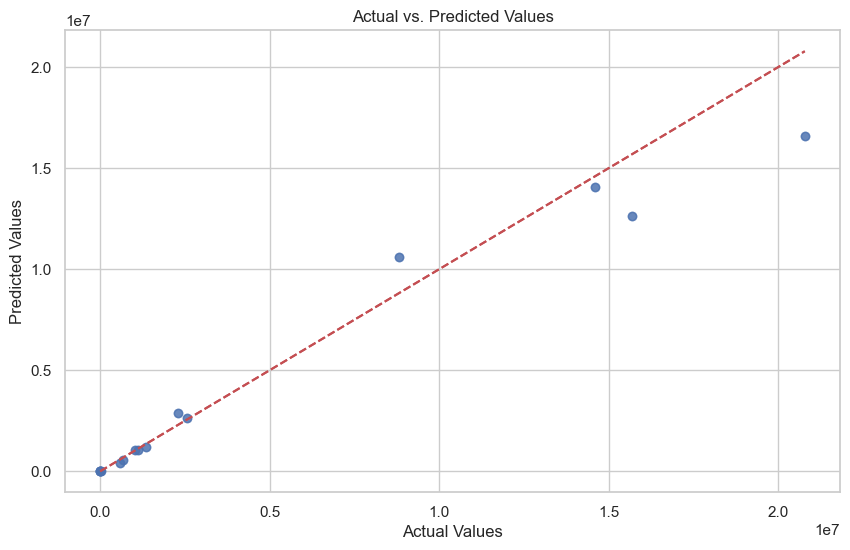

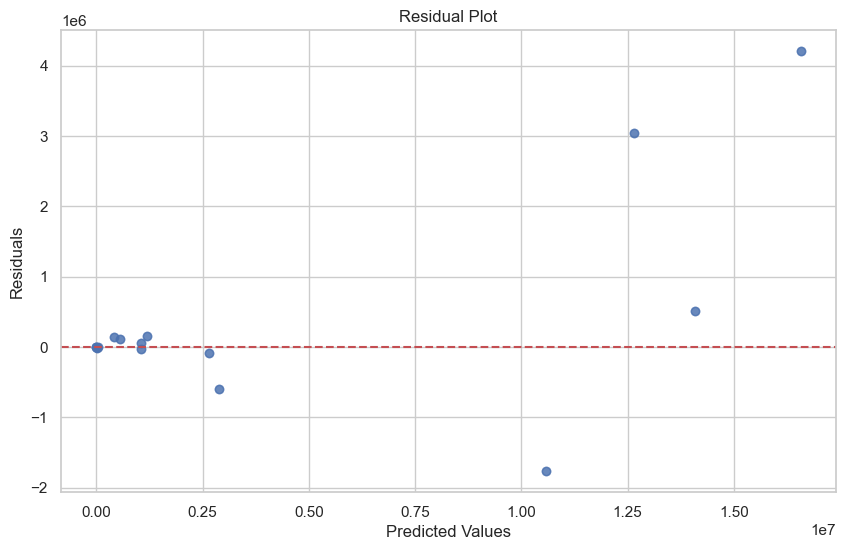

In [183]:

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

# Residual plot
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



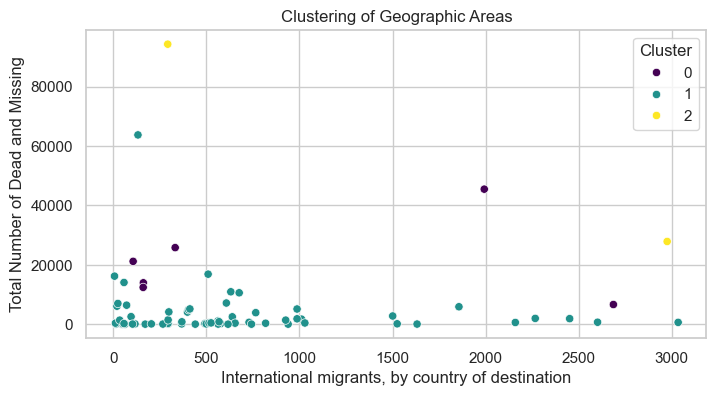

In [184]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant features
features = ['gwarea_tot', 'gwsum_bestdeaths', 'peaceyears',
       'peaceyearshigh', 'Number of Dead',
       'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Internally displaced persons (IDPs)',
       'International migrants, by country of destination',
       'New internal displacements', 'Refugees, by country of asylum',
       'Refugees, by country of origin'
]

# Prepare the data
X = final_df[features].dropna()

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
final_df['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(8, 4))
sns.scatterplot(data=final_df, x='International migrants, by country of destination', y='Total Number of Dead and Missing', hue='Cluster', palette='viridis')
plt.title('Clustering of Geographic Areas')
plt.show()
